In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

#Load the cleaned dataset
cleaned_data = 'cleaned_sales_data.xlsx'
data_frame = pd.read_excel(cleaned_data)


In [59]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12137 entries, 0 to 12136
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Invoice ID                           12137 non-null  int64         
 1   Invoices.Invoice Date                12137 non-null  datetime64[ns]
 2   Invoice Number                       12137 non-null  object        
 3   Invoice Status                       12137 non-null  object        
 4   Customer Name                        12137 non-null  object        
 5   Invoices.Sub Total (BCY)             12137 non-null  float64       
 6   Product Name                         12137 non-null  object        
 7   Invoice Items.Item ID                12137 non-null  int64         
 8   Invoice Items.Product ID             12137 non-null  int64         
 9   Items.Item ID                        12137 non-null  int64         
 10  Invoice It

In [60]:
data_frame.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Invoice ID,12137.0,77421000017041440.0,77421000000568112.0,77421000009353328.0,77421000016952832.0,77421000024438896.0,77421000034457536.0,9318061.879852
Invoices.Invoice Date,12137,2022-01-03 07:26:20.654198016,2019-10-31 00:00:00,2020-12-23 00:00:00,2021-11-09 00:00:00,2022-12-15 00:00:00,2024-06-19 00:00:00,NaN
Invoices.Sub Total (BCY),12137.0,927.513787,0.0,186.58,433.3,972.71,42159.12,1751.357044
Invoice Items.Item ID,12137.0,77421000017041568.0,77421000000581008.0,77421000009353328.0,77421000016952832.0,77421000024438896.0,77421000034457536.0,9317977.617391
Invoice Items.Product ID,12137.0,77421000003862832.0,77421000000093056.0,77421000000133152.0,77421000000138384.0,77421000002735408.0,77421000034224736.0,6922677.665133
Items.Item ID,12137.0,77421000003862832.0,77421000000093056.0,77421000000133152.0,77421000000138384.0,77421000002735408.0,77421000034224736.0,6922677.665133
Invoice Items.Item Price,12137.0,273.850913,0.0,74.31,142.8,315.0,18026.35,454.874989
Invoice Items.Discount Amount (BCY),12137.0,8.043002,0.0,0.0,0.0,0.0,4506.59,62.299414
Invoice Items.Discount Amount (FCY),12137.0,8.111352,0.0,0.0,0.0,0.0,4506.59,62.455739
Invoices.Adjustment (BCY),12137.0,-2.24624,-8821.3,0.0,0.0,0.0,325.83,90.24625


In [61]:
#Verifying the data column format and preparing 
data_frame['Invoices.Invoice Date'] = pd.to_datetime(data_frame['Invoices.Invoice Date'])

In [62]:
#Calculate Total and Average Sales
total_sales = data_frame['Invoices.Sub Total (BCY)'].sum()
average_sales = data_frame['Invoices.Sub Total (BCY)'].mean()
print('total_sales:', total_sales)
print('average_sales:', average_sales)

total_sales: 11257234.830000002
average_sales: 927.5137867677352


In [63]:
# Setting the invoice date as the index for easier resampling
data_frame.set_index('Invoices.Invoice Date', inplace=True)

# Calculating daily, monthly, and quarterly sales trends
daily_sales = data_frame['Invoices.Sub Total (BCY)'].resample('D').sum()
monthly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('M').sum()
quarterly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('Q').sum()


daily_sales.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\1542240491.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('M').sum()
C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\1542240491.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('Q').sum()


Invoices.Invoice Date
2019-10-31    75077.04
2019-11-01      735.38
2019-11-02        0.00
2019-11-03        0.00
2019-11-04        0.00
Freq: D, Name: Invoices.Sub Total (BCY), dtype: float64

In [64]:
monthly_sales.head()

Invoices.Invoice Date
2019-10-31     75077.04
2019-11-30    194106.24
2019-12-31    162591.86
2020-01-31    126535.52
2020-02-29    164812.37
Freq: ME, Name: Invoices.Sub Total (BCY), dtype: float64

In [65]:
quarterly_sales.head()

Invoices.Invoice Date
2019-12-31    431775.14
2020-03-31    468900.18
2020-06-30    365182.81
2020-09-30    655797.37
2020-12-31    771986.47
Freq: QE-DEC, Name: Invoices.Sub Total (BCY), dtype: float64

## Matplotlib Visualization

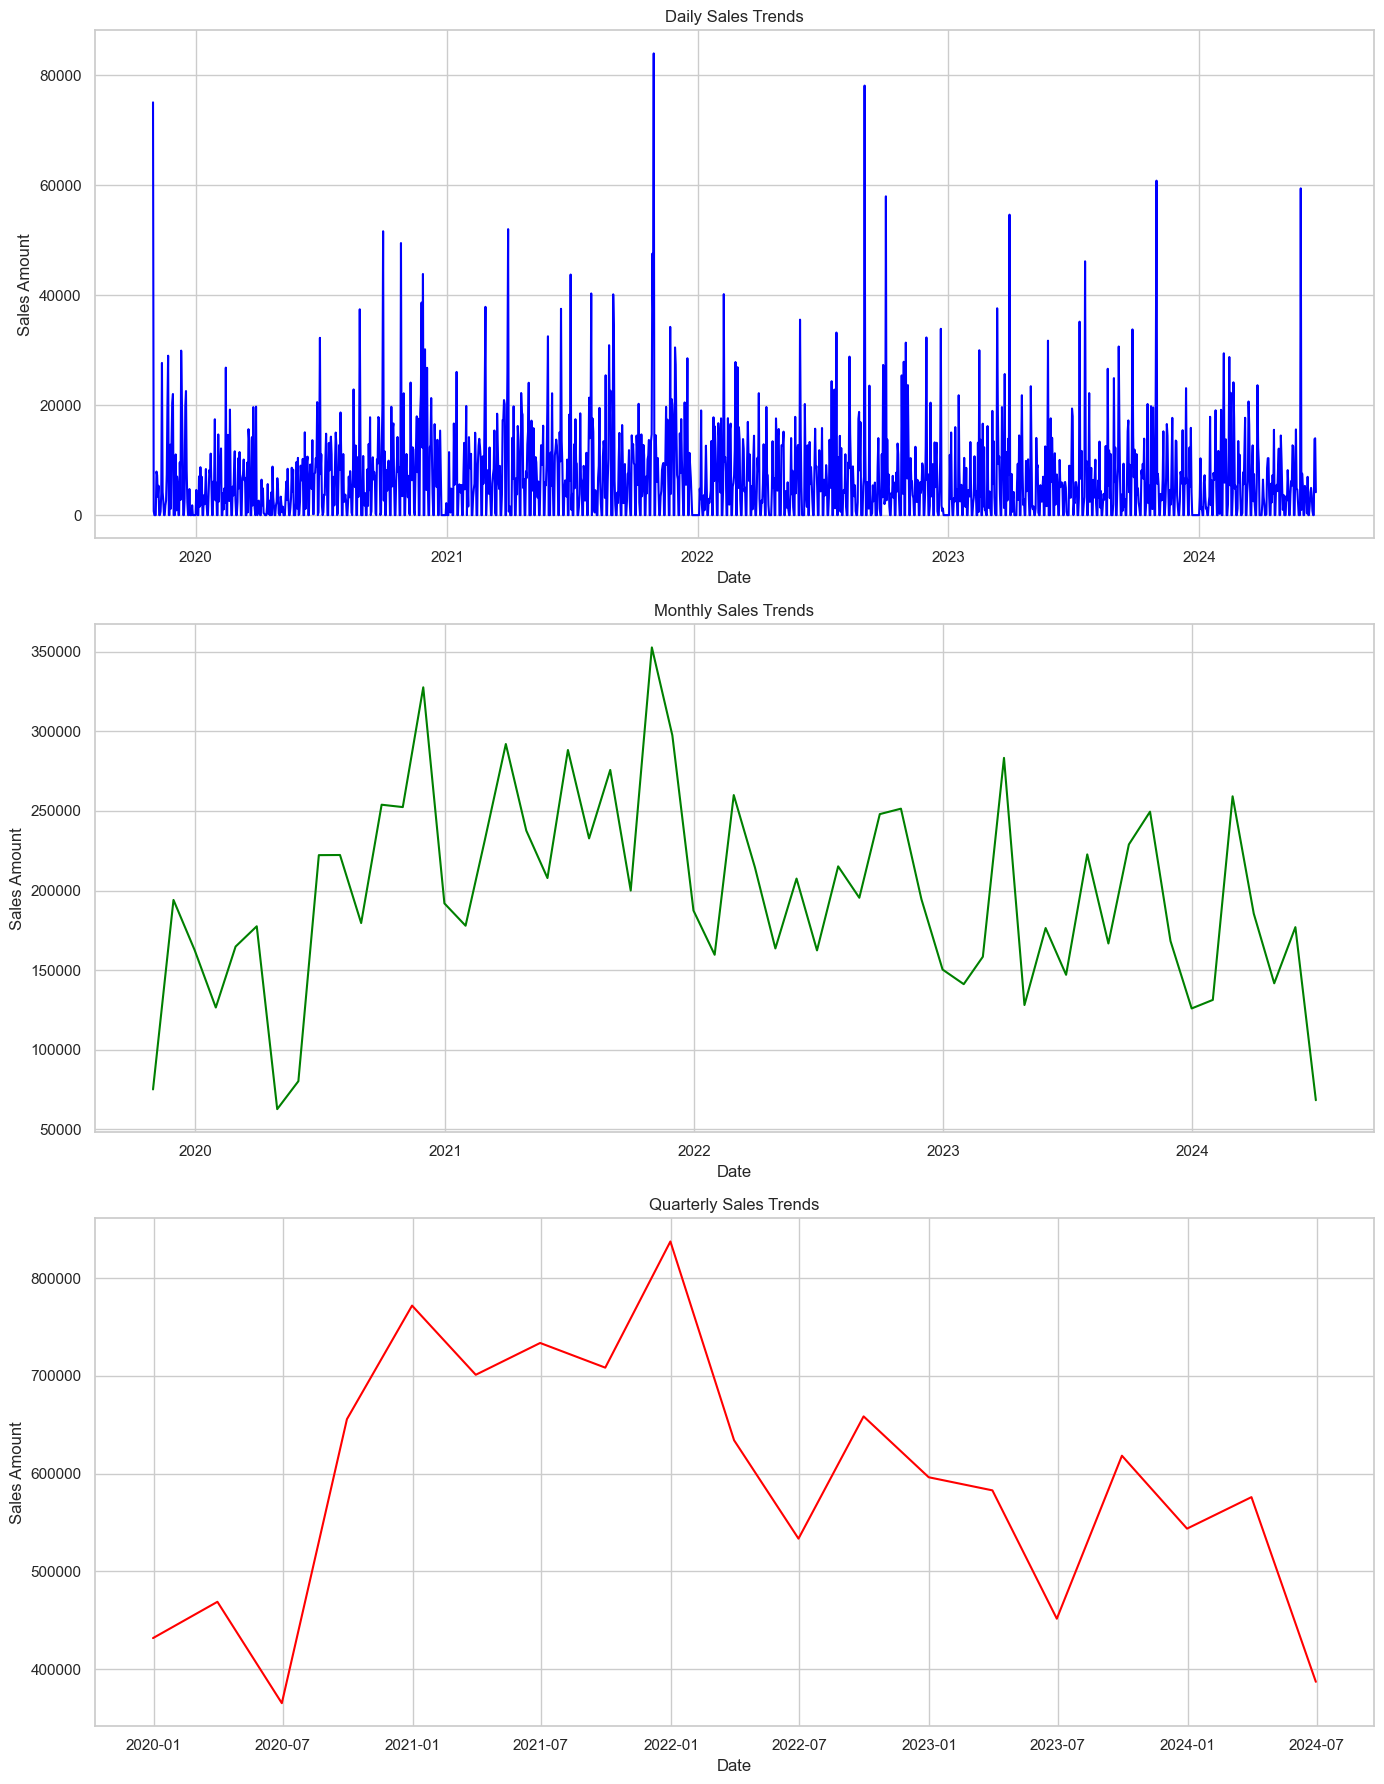

In [66]:
import matplotlib.pyplot as plt

# Plotting daily, monthly, and quarterly sales trends
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Daily sales plot
axes[0].plot(daily_sales.index, daily_sales.values, color='blue')
axes[0].set_title('Daily Sales Trends')
axes[0].set_ylabel('Sales Amount')
axes[0].set_xlabel('Date')

# Monthly sales plot
axes[1].plot(monthly_sales.index, monthly_sales.values, color='green')
axes[1].set_title('Monthly Sales Trends')
axes[1].set_ylabel('Sales Amount')
axes[1].set_xlabel('Date')

# Quarterly sales plot
axes[2].plot(quarterly_sales.index, quarterly_sales.values, color='red')
axes[2].set_title('Quarterly Sales Trends')
axes[2].set_ylabel('Sales Amount')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()


## Seaborn Visualization

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\218479480.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('M').sum()


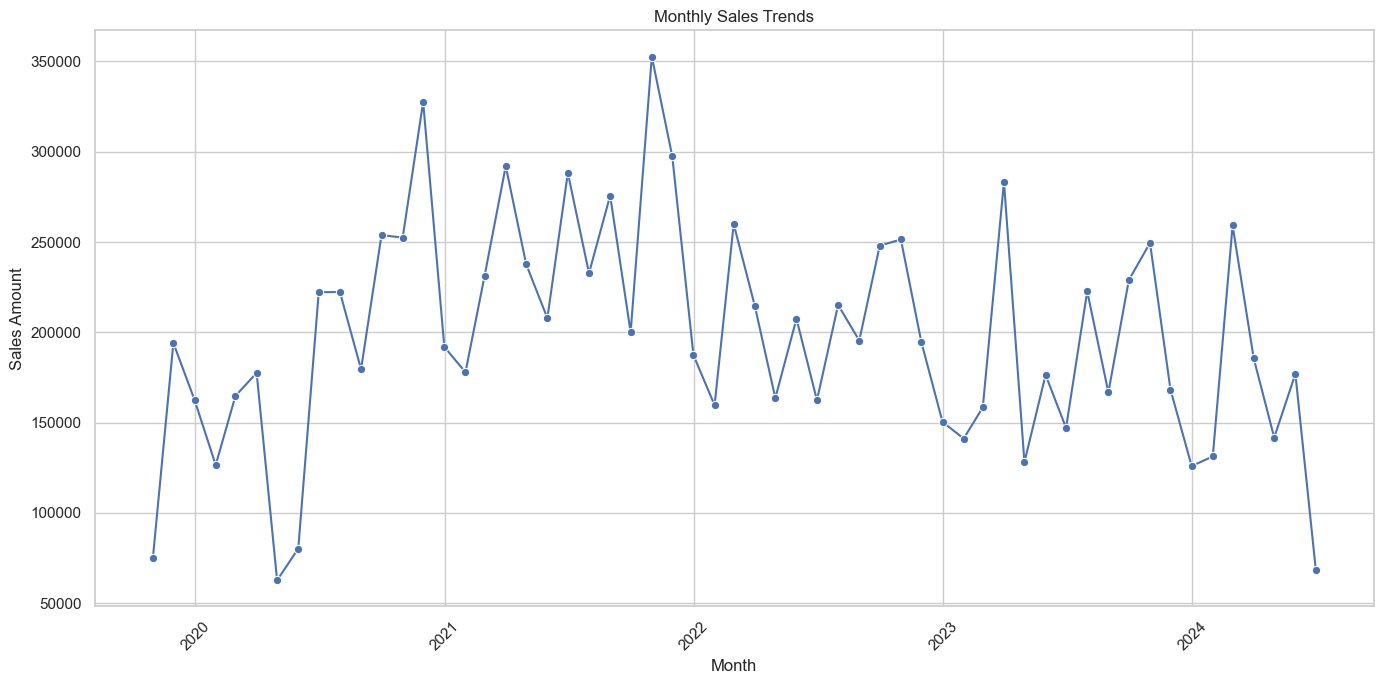

In [67]:

# Aggregate sales monthly
monthly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('M').sum()
monthly_sales_df = monthly_sales.reset_index()

# Create a line plot for monthly sales trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='Invoices.Invoice Date', y='Invoices.Sub Total (BCY)', data=monthly_sales_df, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


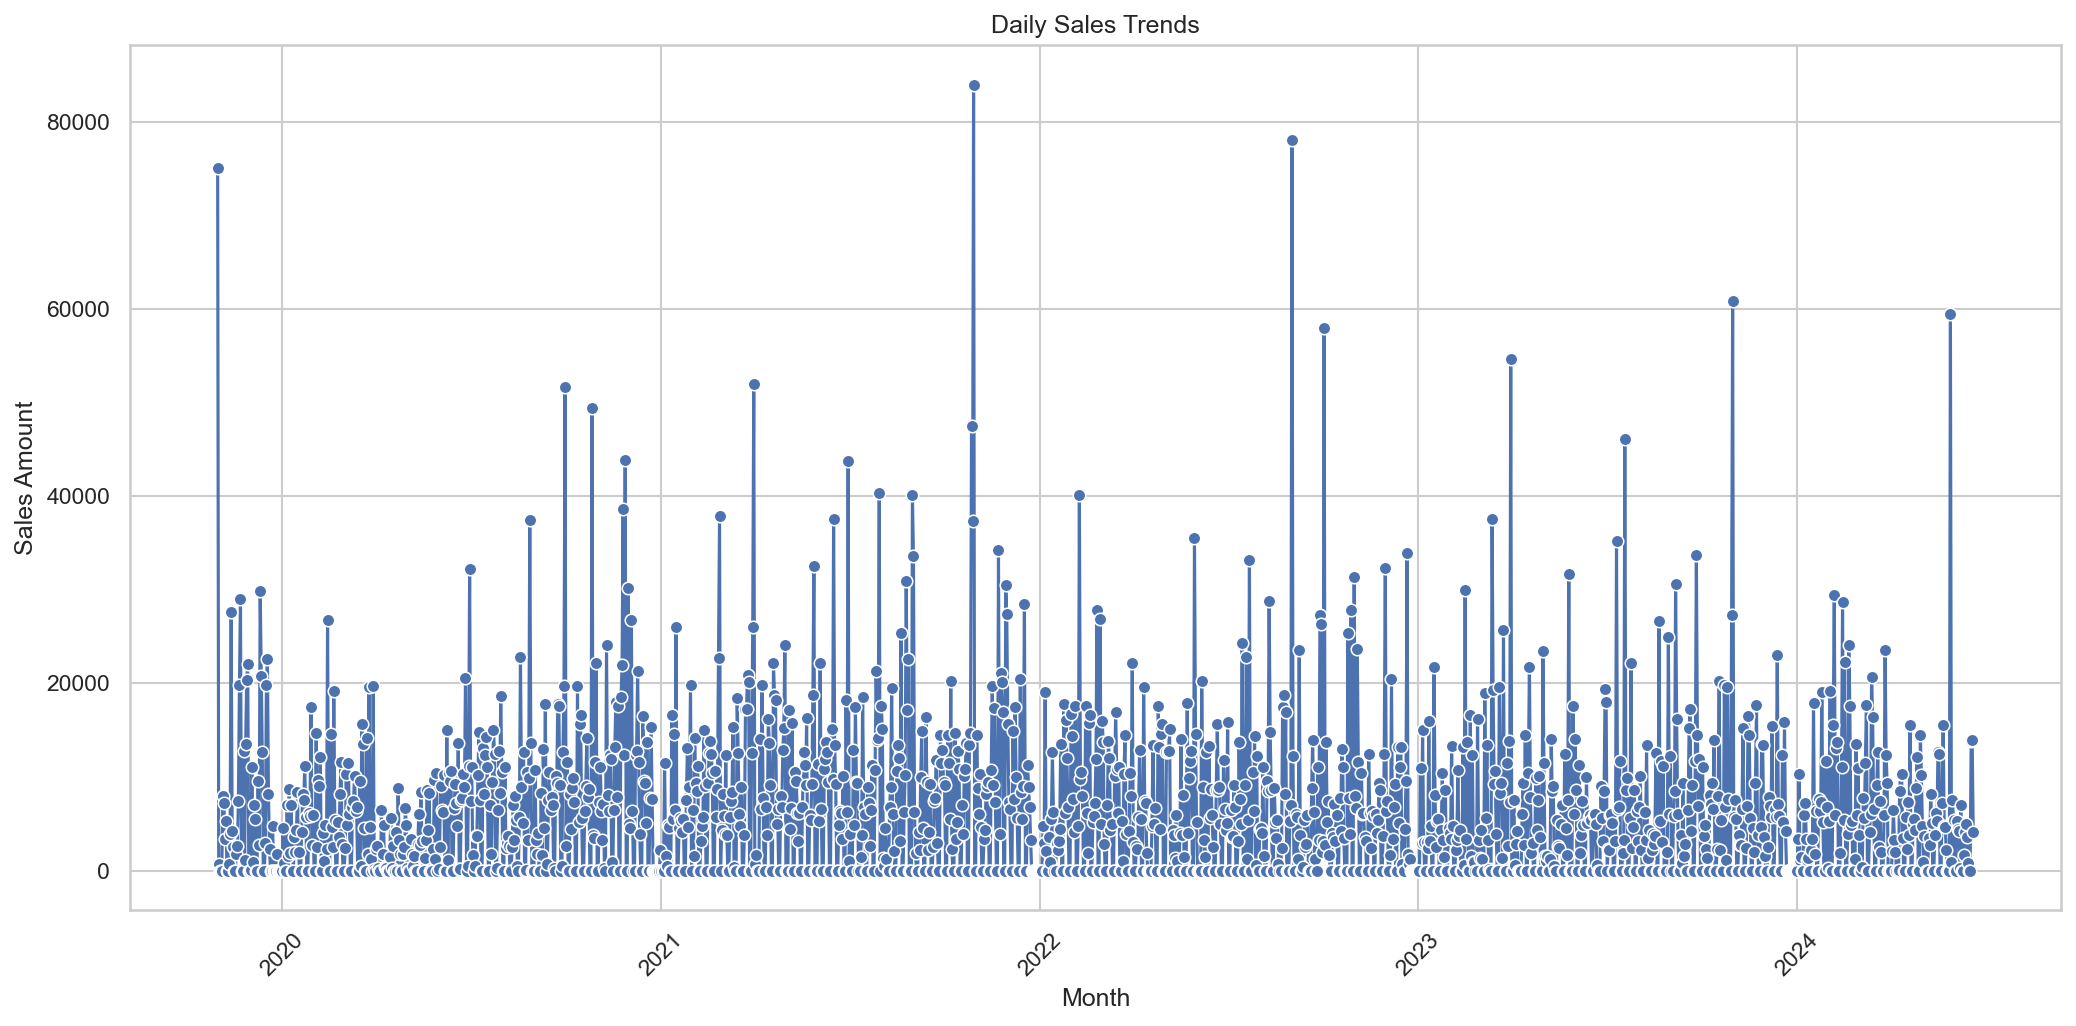

In [68]:

# Aggregate sales monthly
daily_sales = data_frame['Invoices.Sub Total (BCY)'].resample('D').sum()
daily_sales_df = daily_sales.reset_index()

# Create a line plot for monthly sales trends
plt.figure(figsize=(14, 7), dpi=150)
sns.lineplot(x='Invoices.Invoice Date', y='Invoices.Sub Total (BCY)', data = daily_sales_df, marker='o')
plt.title('Daily Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\2988861250.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('Q').sum()


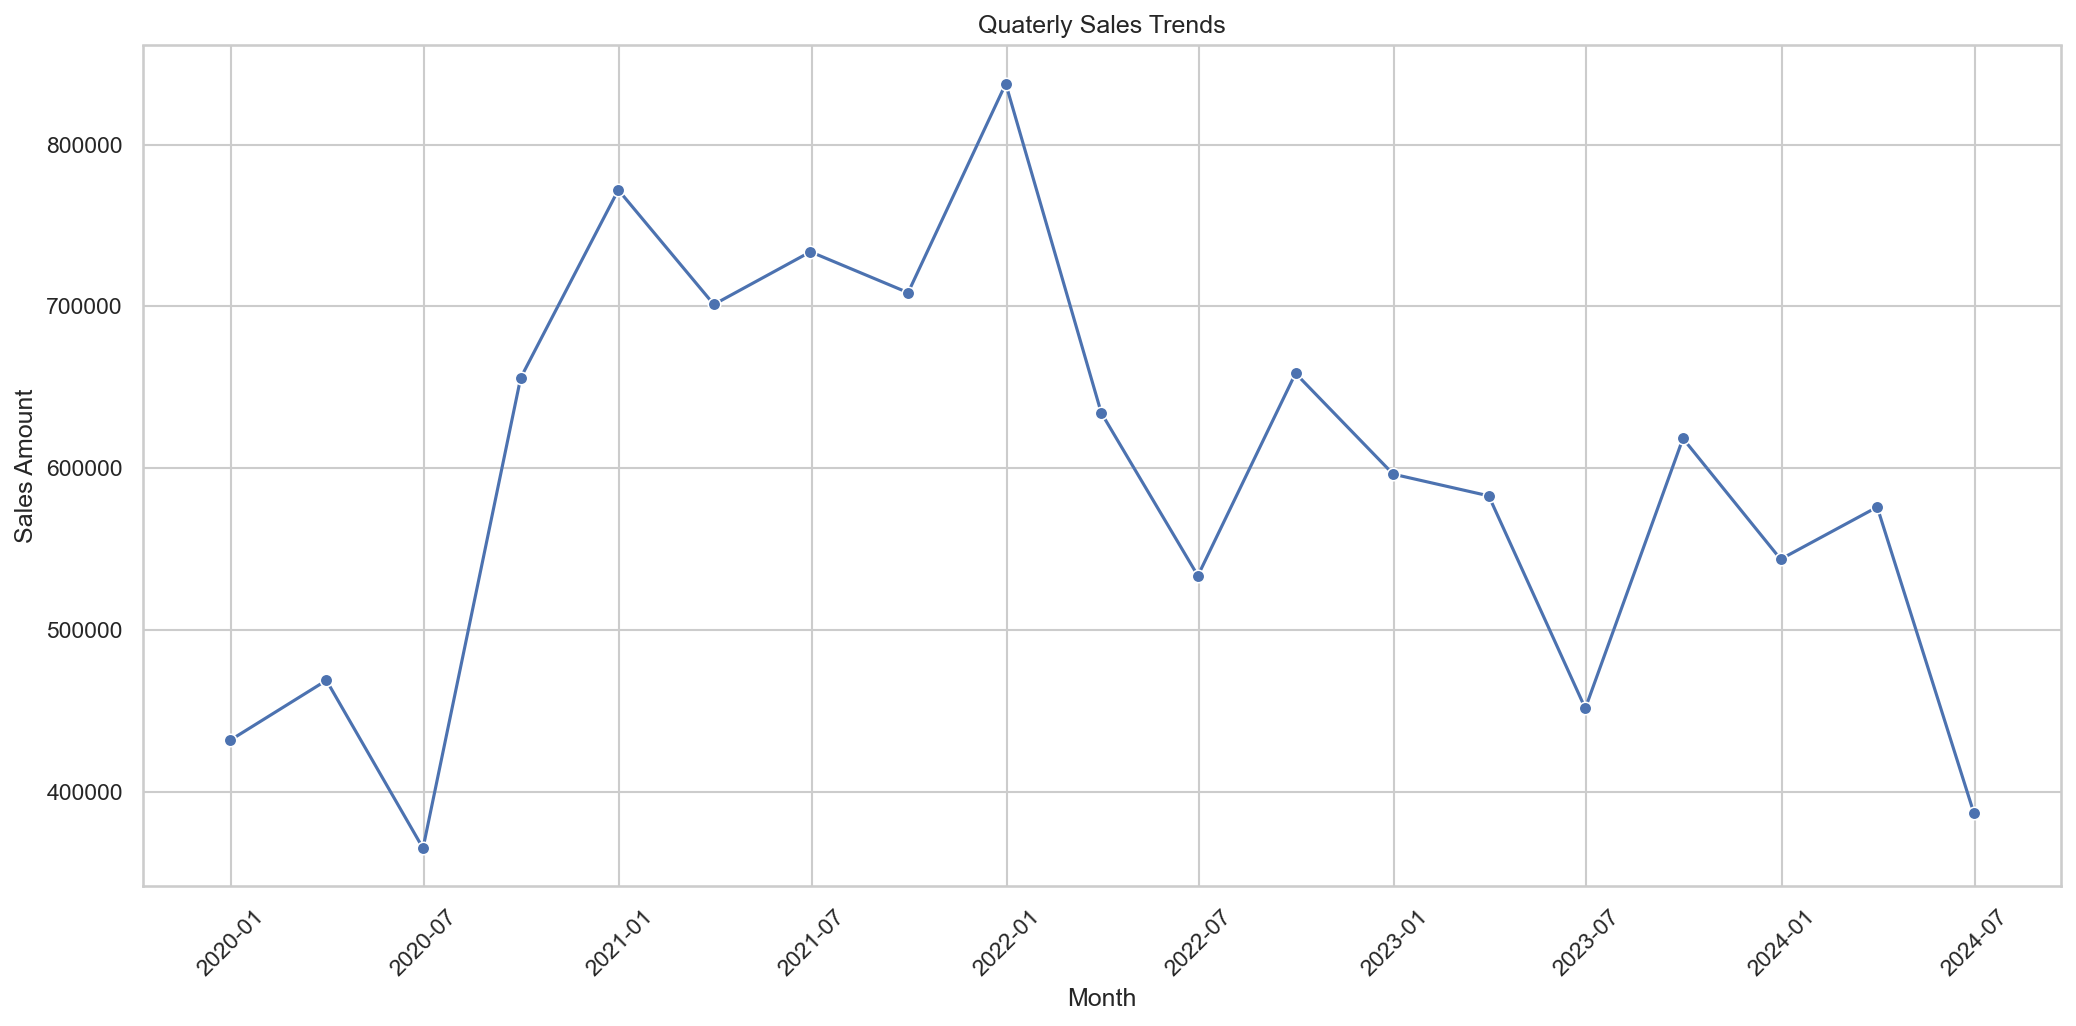

In [69]:

# Aggregate sales monthly
quarterly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('Q').sum()
quarterly_sales_df = quarterly_sales.reset_index()

# Create a line plot for monthly sales trends
plt.figure(figsize=(14, 7), dpi=150)
sns.lineplot(x='Invoices.Invoice Date', y='Invoices.Sub Total (BCY)', data = quarterly_sales_df, marker='o')
plt.title('Quaterly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\1687907041.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('M').sum()


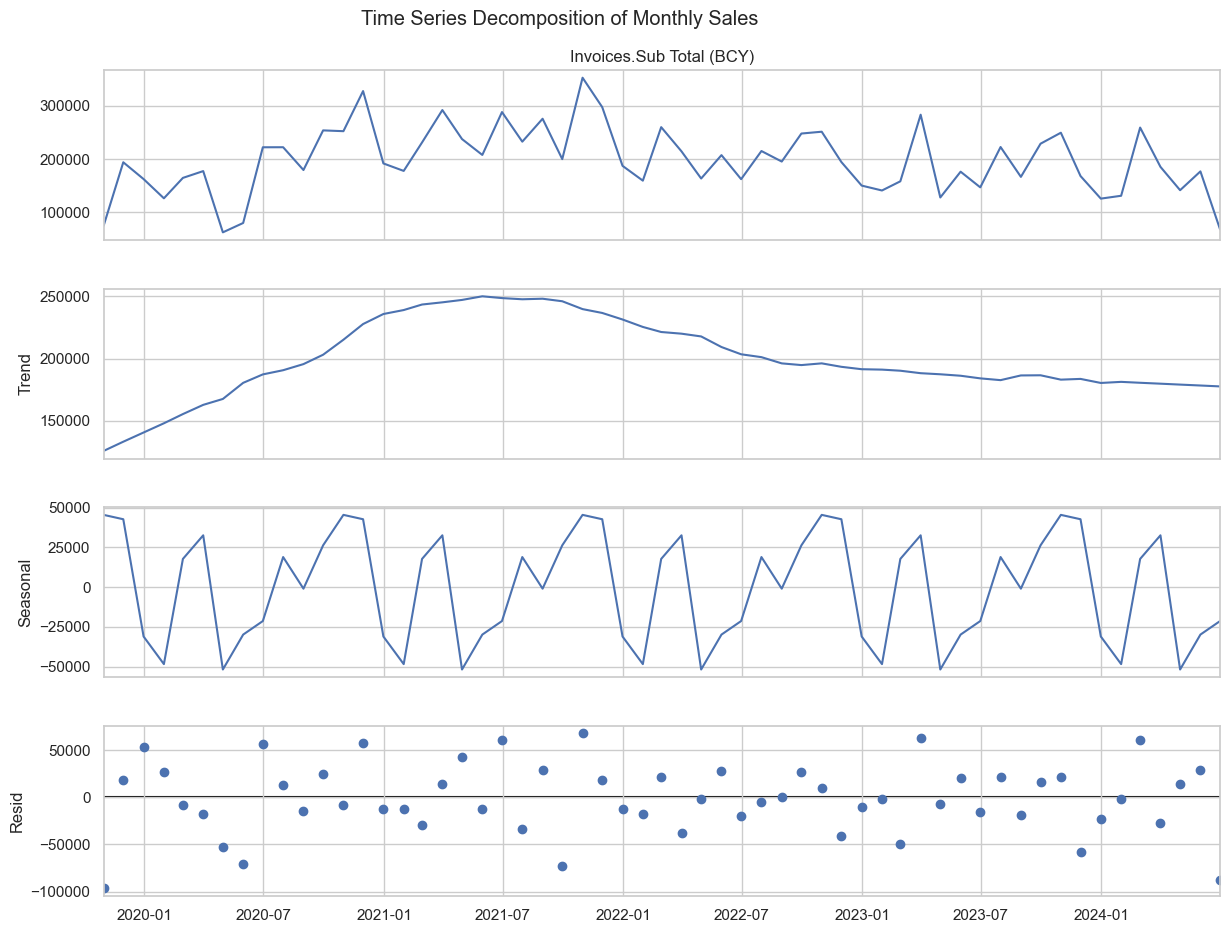

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Aggregate sales monthly
monthly_sales = data_frame['Invoices.Sub Total (BCY)'].resample('M').sum()

# Apply the seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive', extrapolate_trend='freq')

# Plotting the trend, seasonal, and residual components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition of Monthly Sales')
plt.show()

## 3. Customer Insights

#### Identify the top 100 customers by total sales value.

In [71]:
# Grouping data by 'Customer Name' and summing up the sales
top_customers = data_frame.groupby('Customer Name')['Invoices.Sub Total (BCY)'].sum()

# Sorting the customers by total sales in descending order to get the top spenders
top_customers = top_customers.sort_values(ascending=False).head(100)

# Display the top 100 customers
print(top_customers)


Customer Name
Customer Name_8      420526.16
Customer Name_127    290234.10
Customer Name_288    227943.86
Customer Name_84     222126.32
Customer Name_75     208745.09
                       ...    
Customer Name_96      27361.93
Customer Name_709     27318.41
Customer Name_290     26585.73
Customer Name_15      26068.33
Customer Name_706     26064.53
Name: Invoices.Sub Total (BCY), Length: 100, dtype: float64


### Analyze Customer Purchase Frequency and Average Order Value

In [72]:
# Count the number of invoices for each customer
purchase_frequency = data_frame.groupby('Customer Name').size()

In [73]:
# Calculate the average order value for each customer
average_order_value = data_frame.groupby('Customer Name')['Invoices.Sub Total (BCY)'].mean()
average_order_value.head()


Customer Name
Customer Name_1       1903.014953
Customer Name_10       990.996061
Customer Name_100     1628.348333
Customer Name_1000    1706.650000
Customer Name_1001      41.040000
Name: Invoices.Sub Total (BCY), dtype: float64

### Determine the Customer Lifetime Value (CLV) for the Top Customers

- Calculating Customer Lifetime Value (CLV)
To calculate the CLV, we'll use the previously identified Average Order Value (AOV) and Purchase Frequency for each of your top customers. The formula for CLV, assuming a basic model where the discount rate is not considered, is typically expressed as:

- CLV = AOV × Purchase Frequency × Customer Lifespan


- AOV (Average Order Value) is the average amount spent per order by each customer.

- Purchase Frequency is the total number of transactions divided by the period (e.g., total orders per year).

- Customer Lifespan is an estimate of the number of years a customer will continue to be active. 

- For simplicity, we might assume a fixed period like 5 years, unless specific industry data suggests otherwise.

In [74]:
# Considering the average lifespan of a customer is 5 years
customer_lifespan = 5

# Calculate CLV for the top customers
clv = average_order_value * purchase_frequency * customer_lifespan

In [75]:

# Calculating Purchase Frequency
purchase_frequency = data_frame.groupby('Customer Name').size()

# Calculating Average Order Value
average_order_value = data_frame.groupby('Customer Name')['Invoices.Sub Total (BCY)'].mean()

# Combining both metrics into a single DataFrame
customer_insights = pd.DataFrame({
    'Purchase Frequency': purchase_frequency,
    'Average Order Value': average_order_value
})

# Considering the average lifespan of a customer is 5 years
customer_lifespan = 5

# Calculate CLV for each customer
clv = average_order_value * purchase_frequency * customer_lifespan

# Add CLV to the DataFrame
customer_insights['Customer Lifetime Value'] = clv

# Filtering for the top 100 customers based on their total sales value
top_customers = customer_insights.sort_values(by='Customer Lifetime Value', ascending=False).head(100)

# Display the insights for the top 100 customers
top_customers.head()

,Purchase Frequency,Average Order Value,Customer Lifetime Value
Customer Name,,,
Customer Name_8,366,1148.978579,2102630.80
Customer Name_127,269,1078.937175,1451170.50
Customer Name_288,230,991.060261,1139719.30
Customer Name_84,183,1213.805027,1110631.60
Customer Name_75,64,3261.642031,1043725.45


### Product Performance

In [76]:
# Grouping data by 'Product Name' and calculating the total sales volume and value
product_sales = data_frame.groupby('Product Name').agg({
    'Invoice Items.Quantity': 'sum',  # Summing up the quantity sold of each product
    'Invoices.Sub Total (BCY)': 'sum'  # Summing up the total sales value of each product
}).rename(columns={
    'Invoice Items.Quantity': 'Total Units Sold', 
    'Invoices.Sub Total (BCY)': 'Total Sales Value'
})

# Sorting products by total sales value to identify the best-selling products
product_sales = product_sales.sort_values(by='Total Sales Value', ascending=False)

# Grouping data by 'Product Brand' and calculating the total sales volume and value
brand_sales = data_frame.groupby('Product Brand').agg({
    'Invoice Items.Quantity': 'sum',  # Summing up the quantity sold of each brand's products
    'Invoices.Sub Total (BCY)': 'sum'  # Summing up the total sales value of each brand's products
}).rename(columns={
    'Invoice Items.Quantity': 'Total Units Sold', 
    'Invoices.Sub Total (BCY)': 'Total Sales Value'
})

# Sorting brands by total sales value to identify the best-selling brands
brand_sales = brand_sales.sort_values(by='Total Sales Value', ascending=False)

# Output the results
print("Best-Selling Products:\n", product_sales.head())

print("Best-Selling Brands:\n", brand_sales.head())


Best-Selling Products:
                  Total Units Sold  Total Sales Value
Product Name                                        
Product Name_24               849          455584.60
Product Name_1                289          238770.83
Product Name_9               1118          219910.43
Product Name_3               1612          155902.01
Product Name_37               542          152659.66
Best-Selling Brands:
                   Total Units Sold  Total Sales Value
Product Brand                                        
Product Brand_3               8662         2437360.62
Product Brand_1               7271         2416440.50
Product Brand_12              2135         1683715.39
Product Brand_10              2464         1265560.86
Product Brand_26              1511          513854.47


C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\635999540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales['Total Sales Value'].head(10), y=product_sales.index[:10], palette='viridis')


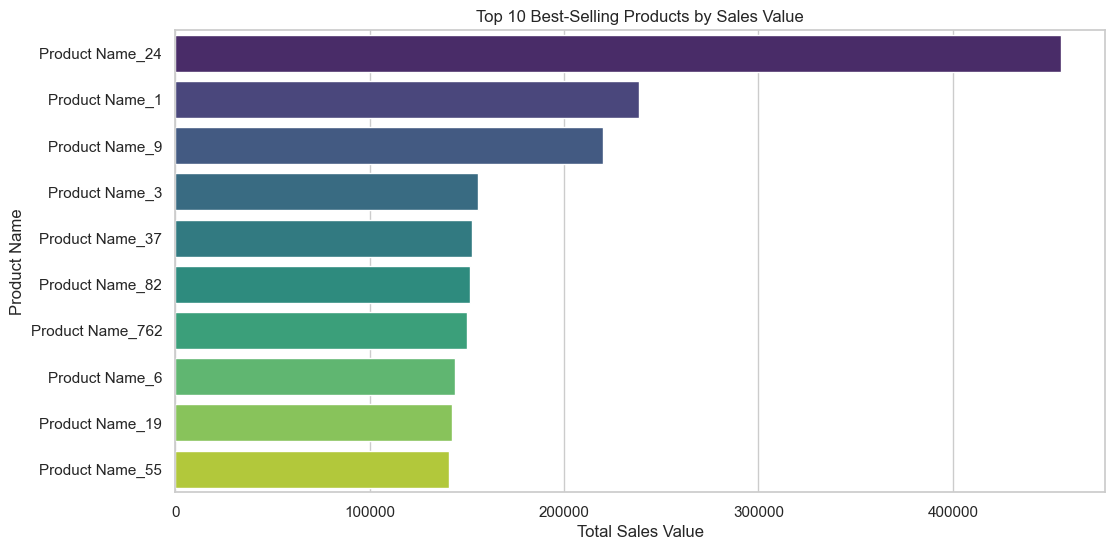

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\635999540.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales['Total Units Sold'].head(10), y=product_sales.index[:10], palette='viridis')


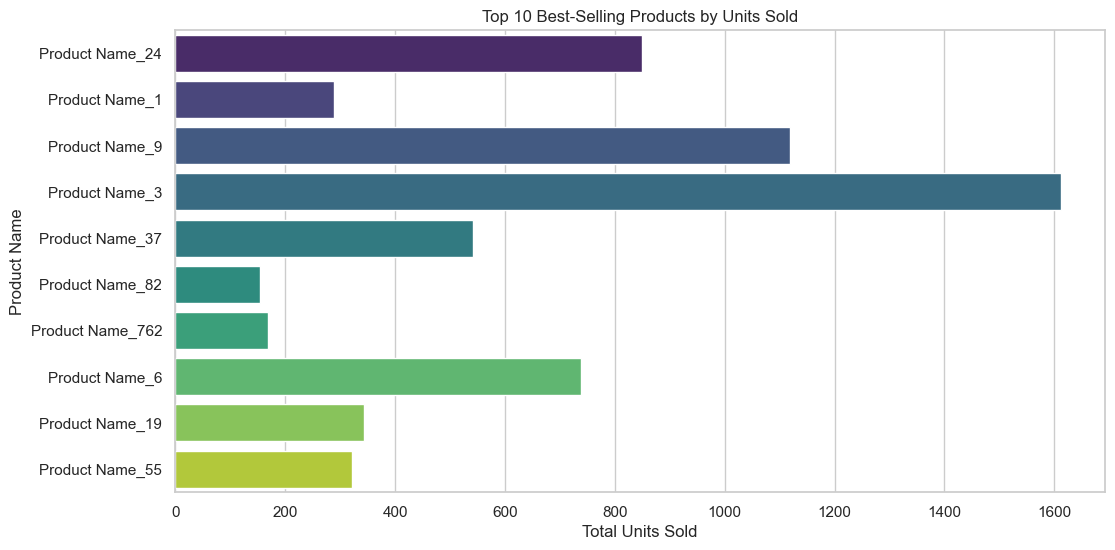

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Top products by Total Sales Value
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales['Total Sales Value'].head(10), y=product_sales.index[:10], palette='viridis')
plt.title('Top 10 Best-Selling Products by Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Name')
plt.show()

# Top products by Total Units Sold
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales['Total Units Sold'].head(10), y=product_sales.index[:10], palette='viridis')
plt.title('Top 10 Best-Selling Products by Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Product Name')
plt.show()

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\714522819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_sales['Total Sales Value'].head(10), y=brand_sales.index[:10], palette='coolwarm')


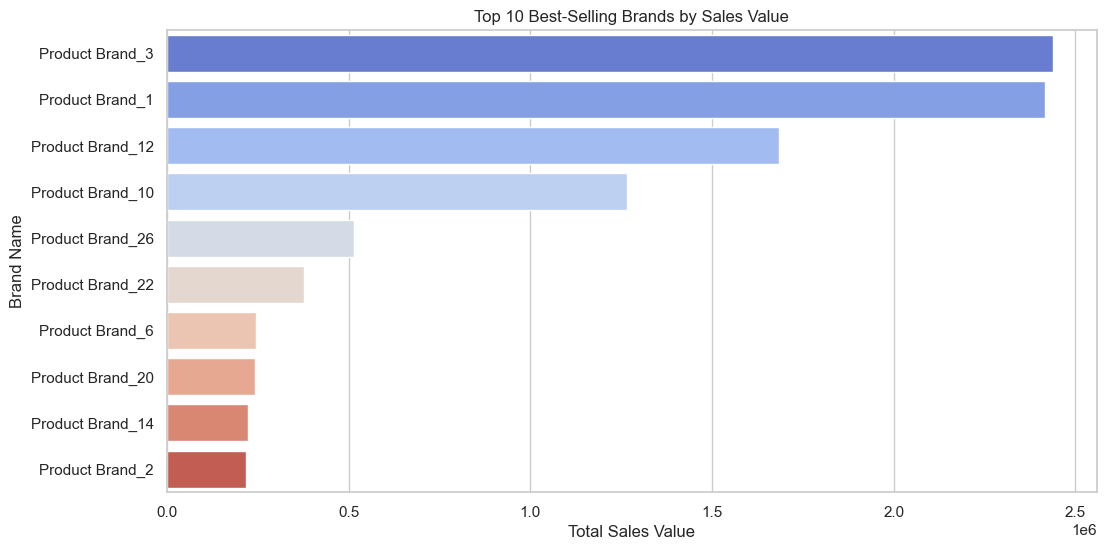

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\714522819.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_sales['Total Units Sold'].head(10), y=brand_sales.index[:10], palette='coolwarm')


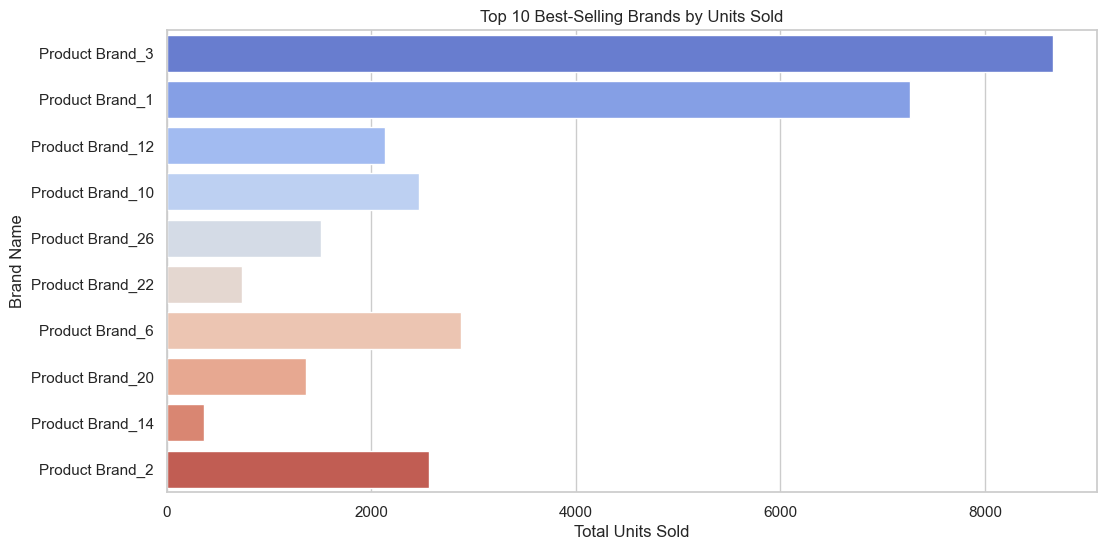

In [78]:
# Top brands by Total Sales Value
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_sales['Total Sales Value'].head(10), y=brand_sales.index[:10], palette='coolwarm')
plt.title('Top 10 Best-Selling Brands by Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Brand Name')
plt.show()

# Top brands by Total Units Sold
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_sales['Total Units Sold'].head(10), y=brand_sales.index[:10], palette='coolwarm')
plt.title('Top 10 Best-Selling Brands by Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Brand Name')
plt.show()

## Calculate the gross profit margins for each product.

To calculate the gross profit margins for each product, we need to know the cost associated with each product (often termed Cost of Goods Sold or COGS). Since your dataset does not explicitly include a cost column, you will need to either provide this information or estimate it from the data you have (for example, if you have purchase prices or can estimate the cost based on the sales price and known margins).

### Assumptions and Calculation Steps: Consideration
Assume or Calculate Cost: If cost data isn't directly available, you might estimate it. For simplicity, let’s assume you can calculate it as a certain percentage of the sales price if you don't have direct cost figures. This is common in scenarios where the cost is a consistent percentage of the sale price due to stable supply chain conditions.

- Calculate Gross Profit:
- Gross Profit = Sales Revenue - Cost

- Calculate Gross Profit Margin:
- Gross Profit Margin (%) = (Gross Profit / Sales Revenue) * 100

- The code estimates costs as 60% of sales revenue, calculates gross profit by subtracting these costs from total sales, and then computes the gross profit margin as a percentage.
- It aggregates these margins by product to identify which products are most profitable on average.

In [79]:
# Considering the cost is 60% of the sales price for demonstration purposes.
data_frame['Estimated Cost'] = data_frame['Invoices.Sub Total (BCY)'] * 0.6

# Calculate Gross Profit
data_frame['Gross Profit'] = data_frame['Invoices.Sub Total (BCY)'] - data_frame['Estimated Cost']

# Calculate Gross Profit Margin
data_frame['Gross Profit Margin'] = (data_frame['Gross Profit'] / data_frame['Invoices.Sub Total (BCY)']) * 100

# Aggregate Gross Profit Margin by Product Name to get average margins per product
product_profit_margins = data_frame.groupby('Product Name').agg({
    'Gross Profit Margin': 'mean'
}).sort_values(by='Gross Profit Margin', ascending=False)

# Display the products with the highest profit margins
print("Products with Highest Gross Profit Margins:\n", product_profit_margins.head(10))

Products with Highest Gross Profit Margins:
                    Gross Profit Margin
Product Name                          
Product Name_2132                 40.0
Product Name_745                  40.0
Product Name_240                  40.0
Product Name_24                   40.0
Product Name_2399                 40.0
Product Name_71                   40.0
Product Name_1297                 40.0
Product Name_1868                 40.0
Product Name_725                  40.0
Product Name_726                  40.0


C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\951329700.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_profit_margins['Gross Profit Margin'].head(10), y=product_profit_margins.index[:10], palette='magma')


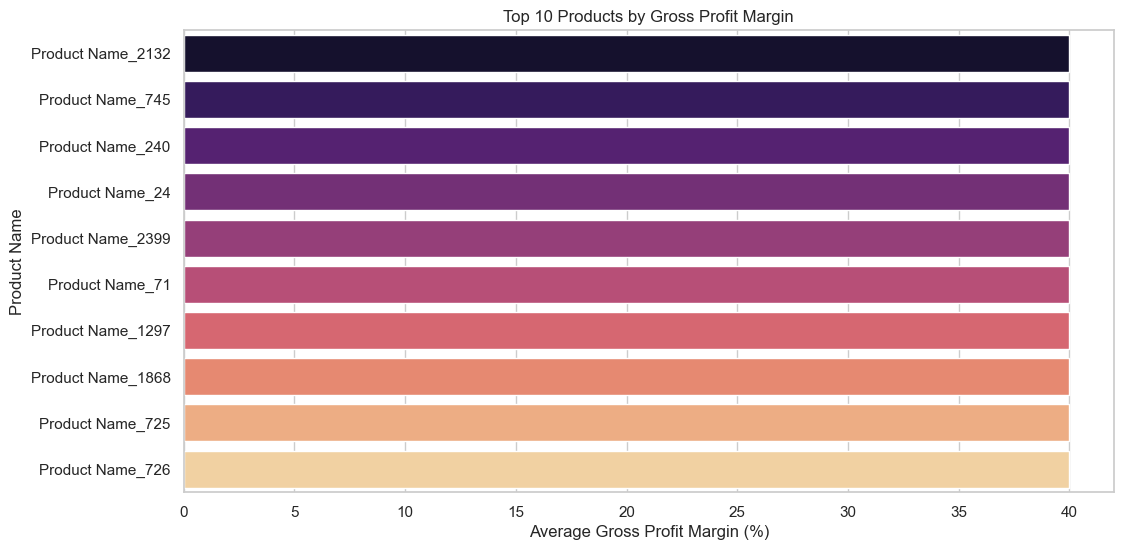

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Top products by Gross Profit Margin
plt.figure(figsize=(12, 6))
sns.barplot(x=product_profit_margins['Gross Profit Margin'].head(10), y=product_profit_margins.index[:10], palette='magma')
plt.title('Top 10 Products by Gross Profit Margin')
plt.xlabel('Average Gross Profit Margin (%)')
plt.ylabel('Product Name')
plt.show()

## Analyse the impact of discounts on product sales and margins.

In [81]:
# Calculate the Discount Percentage (assuming discounts are calculated as the difference between list price and sale price)
data_frame['Discount Amount'] = data_frame['Invoice Items.Discount Amount (BCY)']
data_frame['Discount Percentage'] = (data_frame['Discount Amount'] / data_frame['Invoices.Sub Total (BCY)']) * 100

# Calculate Gross Profit Margin for reference (repeating in case not already present from previous step)
data_frame['Gross Profit'] = data_frame['Invoices.Sub Total (BCY)'] - (data_frame['Invoices.Sub Total (BCY)'] * 0.6)  # Considering cost is 60% of sales price
data_frame['Gross Profit Margin'] = (data_frame['Gross Profit'] / data_frame['Invoices.Sub Total (BCY)']) * 100

# Group data to analyze the average discount and its impact on sales volume and gross profit margin by product
discount_impact_analysis = data_frame.groupby('Product Name').agg({
    'Discount Percentage': 'mean',
    'Invoice Items.Quantity': 'sum',  # Total units sold
    'Gross Profit Margin': 'mean'  # Average gross profit margin
}).sort_values(by='Discount Percentage', ascending=False)

# Display the analysis results
discount_impact_analysis.head()

,Discount Percentage,Invoice Items.Quantity,Gross Profit Margin
Product Name,,,
Product Name_577,inf,62,40.0
Product Name_3,inf,1612,40.0
Product Name_1656,inf,8,NaN
Product Name_804,inf,4,40.0
Product Name_908,47.787611,11,40.0


Since the Gross proft Margin columns contains inf anf Nan values, we need to calculate again and identify potential issues.
It happens if

- inf in Discount Percentage:
This usually happens when the denominator in a division operation is zero. If the Invoices.Sub Total (BCY) value is zero, and there's a non-zero discount, it will result in infinity.

- NaN in Gross Profit Margin:
If both the numerator and denominator are zero in the gross profit margin calculation, it results in NaN.
If the Estimated Cost or Gross Profit has invalid operations or zero division issues, this can also occur.

In [82]:
# Calculate Discount Percentage safely, checking for zero division
data_frame['Discount Percentage'] = data_frame.apply(
    lambda x: (x['Invoice Items.Discount Amount (BCY)'] / x['Invoices.Sub Total (BCY)']) * 100 if x['Invoices.Sub Total (BCY)'] != 0 else 0,
    axis=1
)

# Ensure costs are not calculated as zero if sales are zero, assuming cost is 60% of sales price
data_frame['Estimated Cost'] = data_frame['Invoices.Sub Total (BCY)'] * 0.6

# Calculate Gross Profit Margin safely, checking for zero division
data_frame['Gross Profit'] = data_frame['Invoices.Sub Total (BCY)'] - data_frame['Estimated Cost']
data_frame['Gross Profit Margin'] = data_frame.apply(
    lambda x: (x['Gross Profit'] / x['Invoices.Sub Total (BCY)']) * 100 if x['Invoices.Sub Total (BCY)'] != 0 else 0,
    axis=1
)

# Group data to analyze the average discount and its impact on sales volume and gross profit margin by product
discount_impact_analysis = data_frame.groupby('Product Name').agg({
    'Discount Percentage': 'mean',
    'Invoice Items.Quantity': 'sum',  # Total units sold
    'Gross Profit Margin': 'mean'  # Average gross profit margin
}).sort_values(by='Discount Percentage', ascending=False)

# Display the analysis results
discount_impact_analysis.head()


,Discount Percentage,Invoice Items.Quantity,Gross Profit Margin
Product Name,,,
Product Name_908,47.787611,11,40.0
Product Name_944,42.158725,1,40.0
Product Name_1264,36.216667,6,40.0
Product Name_2381,33.334611,1,40.0
Product Name_1615,33.333358,1,40.0


## Salesperson Performance

### Evaluate the performance of each salesperson based on sales volume and value

In [83]:
# Grouping data by 'Sales Persons.Name' and calculating the total sales volume and value
salesperson_performance = data_frame.groupby('Sales Persons.Name').agg({
    'Invoice Items.Quantity': 'sum',  # Summing up the total units sold by each salesperson
    'Invoices.Sub Total (BCY)': 'sum'  # Summing up the total sales value handled by each salesperson
}).rename(columns={
    'Invoice Items.Quantity': 'Total Units Sold',
    'Invoices.Sub Total (BCY)': 'Total Sales Value'
})

# Sorting salespersons by total sales value to identify top performers
top_salespersons = salesperson_performance.sort_values(by='Total Sales Value', ascending=False)

# Display the performance results
#print("Salesperson Performance (sorted by sales value):\n", top_salespersons.head())
top_salespersons.head()


,Total Units Sold,Total Sales Value
Sales Persons.Name,,
Sales Persons.Name_1,14429,4728836.92
Sales Persons.Name_2,7996,2779919.23
Sales Persons.Name_12,2694,1096382.76
Sales Persons.Name_11,2562,740564.16
Sales Persons.Name_7,1503,586082.04


C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\296204737.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_salespersons.index, rotation=45, ha="right")


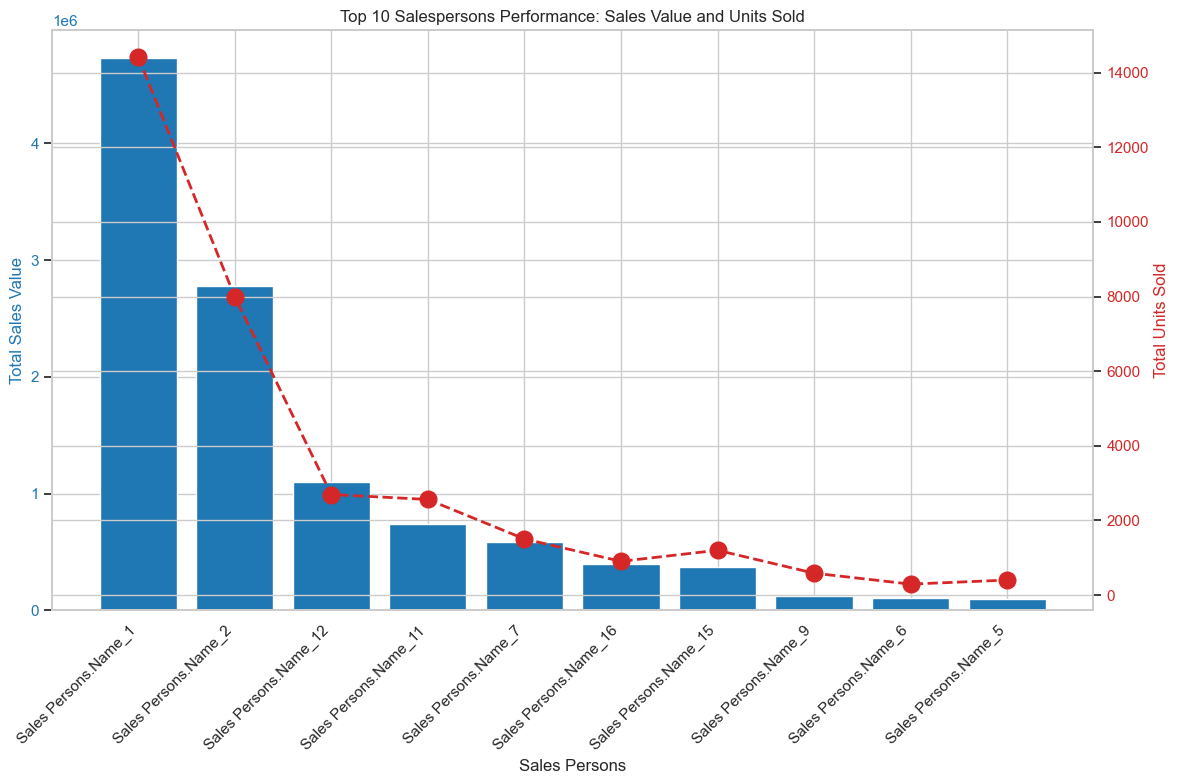

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Top salespersons sorted by Total Sales Value
top_salespersons = top_salespersons.head(10)  # Limiting to top 10 for a cleaner visualization

# Create figure and axes for the subplot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for Total Sales Value
color = 'tab:blue'
ax1.set_xlabel('Sales Persons')
ax1.set_ylabel('Total Sales Value', color=color)
ax1.bar(top_salespersons.index, top_salespersons['Total Sales Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_salespersons.index, rotation=45, ha="right")

# Create a second y-axis to plot the Total Units Sold
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Total Units Sold', color=color)  # we already handled the x-label with ax1
ax2.plot(top_salespersons.index, top_salespersons['Total Units Sold'], color=color, marker='o', linestyle='dashed', linewidth=2, markersize=12)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and adjusting layout
plt.title('Top 10 Salespersons Performance: Sales Value and Units Sold')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Show the plot
plt.show()

- Total Units Sold: This metric will help understand the volume of sales each salesperson is handling.
- Total Sales Value: This will measure the value of sales each salesperson has generated, providing a clearer picture of their contribution to the company's revenue.

To identify the top-performing salespersons and quantify their contributions to the total sales, we'll extend the analysis to calculate the percentage of total sales each top salesperson is responsible for. This will not only highlight who the top performers are but also show how significant their contributions are to the overall business.

Calculating the Contribution to Total Sales

### Identify the top-performing salespersons and their contribution to the total sales.

In [85]:
# Calculate the total sales from all salespersons
total_sales_all = data_frame['Invoices.Sub Total (BCY)'].sum()

# Using the previously created 'top_salespersons' DataFrame to calculate the contribution percentage
top_salespersons['Contribution to Total Sales (%)'] = (top_salespersons['Total Sales Value'] / total_sales_all) * 100

# Sorting to find the top-performing salespersons based on their contribution to total sales
top_contributors = top_salespersons.sort_values(by='Contribution to Total Sales (%)', ascending=False)

# Display the top contributors
print("Top-Performing Salespersons and Their Contributions:\n", top_contributors.head())


Top-Performing Salespersons and Their Contributions:
                        Total Units Sold  Total Sales Value  \
Sales Persons.Name                                           
Sales Persons.Name_1              14429         4728836.92   
Sales Persons.Name_2               7996         2779919.23   
Sales Persons.Name_12              2694         1096382.76   
Sales Persons.Name_11              2562          740564.16   
Sales Persons.Name_7               1503          586082.04   

                       Contribution to Total Sales (%)  
Sales Persons.Name                                      
Sales Persons.Name_1                         42.007091  
Sales Persons.Name_2                         24.694512  
Sales Persons.Name_12                         9.739361  
Sales Persons.Name_11                         6.578562  
Sales Persons.Name_7                          5.206270  


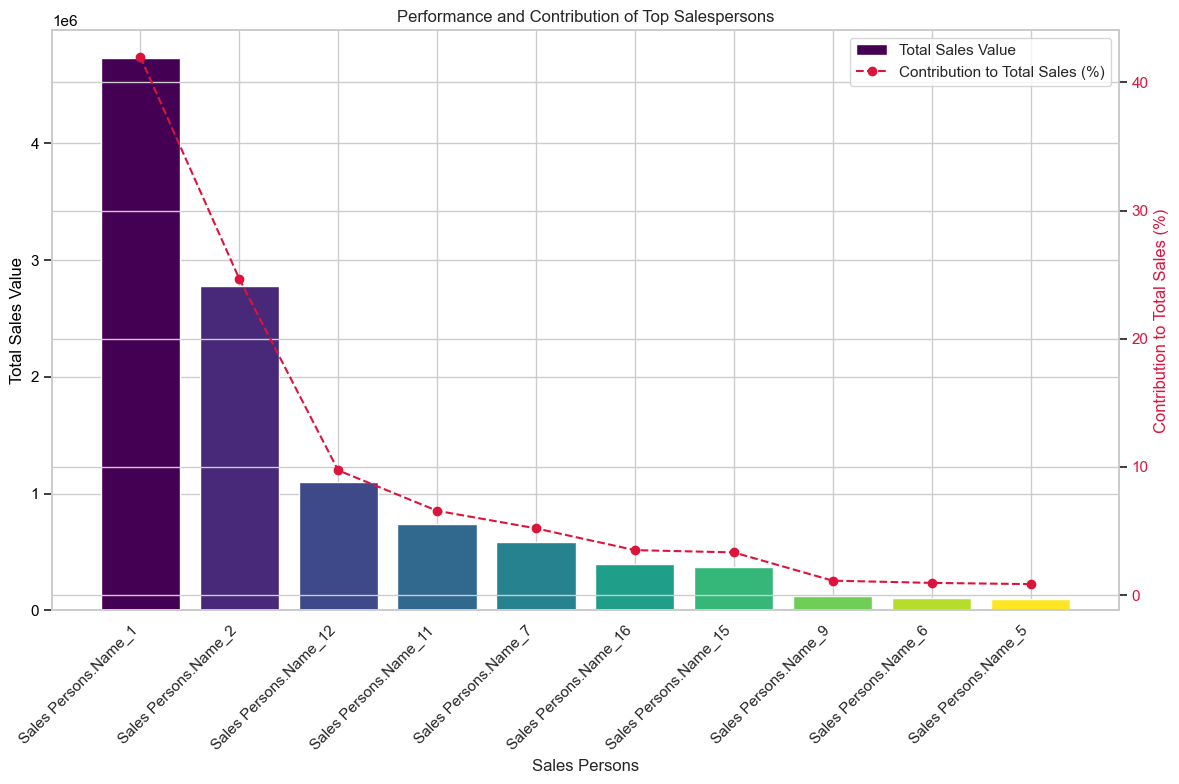

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Setup for the figure and the axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Colors for each salesperson
colors = plt.cm.viridis(np.linspace(0, 1, len(top_contributors)))

# Bar plot for Total Sales Value
bars = ax1.bar(top_contributors.index, top_contributors['Total Sales Value'], color=colors, label='Total Sales Value')

# Set labels and title
ax1.set_xlabel('Sales Persons')
ax1.set_ylabel('Total Sales Value', color='black')
ax1.set_title('Performance and Contribution of Top Salespersons')
ax1.tick_params(axis='y', labelcolor='black')

# Setting the x-ticks to better handle names
ax1.set_xticks(np.arange(len(top_contributors)))
ax1.set_xticklabels(top_contributors.index, rotation=45, ha="right")

# Create a twin axis for the contribution percentage
ax2 = ax1.twinx()
line = ax2.plot(top_contributors.index, top_contributors['Contribution to Total Sales (%)'], color='crimson', marker='o', label='Contribution to Total Sales (%)', linestyle='dashed')
ax2.set_ylabel('Contribution to Total Sales (%)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


## 	Discount Impact Analysis

### Analyzing the Impact of Discounts on Sales Volume and Value

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Discount Percentage
data_frame['Discount Percentage'] = (data_frame['Invoice Items.Discount Amount (BCY)'] / data_frame['Invoice Items.Item Price']) * 100
data_frame['Discount Percentage'] = data_frame['Discount Percentage'].fillna(0)  # Fill NaN values if any calculations result in undefined


In [88]:
# Define bins and labels for the discount ranges
bins = np.arange(0, 105, 5)  # Bins from 0% to 100% in 5% increments
labels = [f"{i}-{i+5}%" for i in range(0, 100, 5)]
data_frame['Discount Bin'] = pd.cut(data_frame['Discount Percentage'], bins=bins, labels=labels, include_lowest=True)

In [89]:
# Aggregate data by discount bin
discount_analysis = data_frame.groupby('Discount Bin').agg({
    'Invoice Items.Quantity': 'sum',
    'Invoices.Sub Total (BCY)': 'sum'
}).rename(columns={
    'Invoice Items.Quantity': 'Total Units Sold',
    'Invoices.Sub Total (BCY)': 'Total Sales Value'
})

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\2333453611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = data_frame.groupby('Discount Bin').agg({


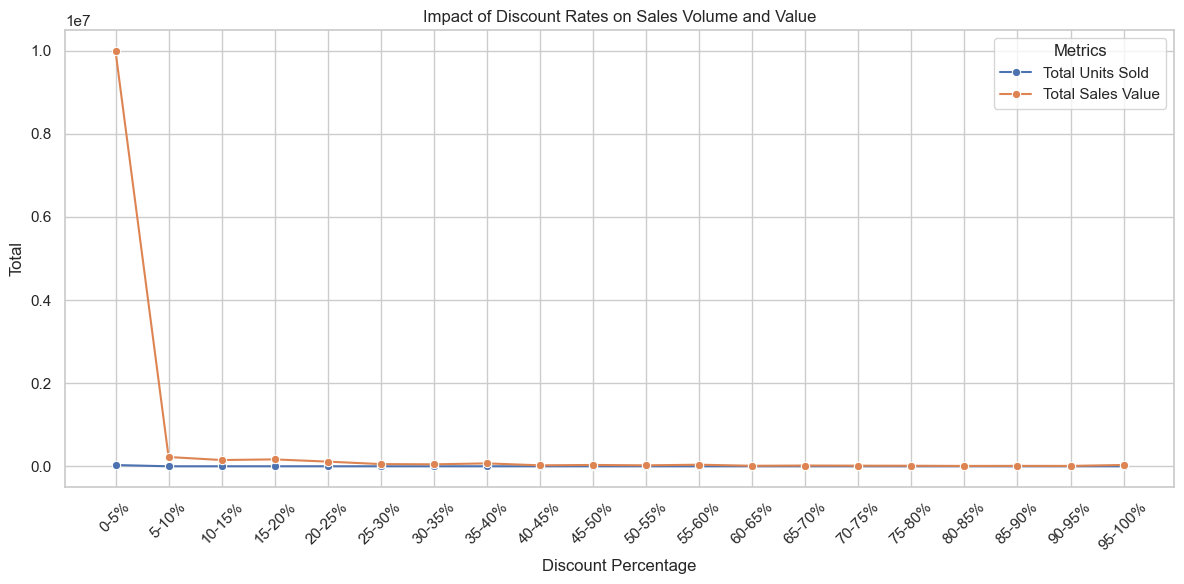

In [90]:
# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=discount_analysis.reset_index(), x='Discount Bin', y='Total Units Sold', marker='o', label='Total Units Sold')
sns.lineplot(data=discount_analysis.reset_index(), x='Discount Bin', y='Total Sales Value', marker='o', label='Total Sales Value')
plt.title('Impact of Discount Rates on Sales Volume and Value')
plt.xlabel('Discount Percentage')
plt.ylabel('Total')
plt.xticks(rotation=45)  # Ensure x labels are rotated for better readability
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()

## For better Visualization we can use Bar Plots 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate Discount Percentage if not already in the dataset
data_frame['Discount Percentage'] = (data_frame['Invoice Items.Discount Amount (BCY)'] / data_frame['Invoice Items.Item Price']) * 100

# Define bins and labels for the discount ranges
bins = np.arange(0, 105, 5)  # Bins from 0% to 100% in 5% increments
labels = [f"{i}-{i+5}%" for i in range(0, 100, 5)]
data_frame['Discount Bin'] = pd.cut(data_frame['Discount Percentage'], bins=bins, labels=labels, include_lowest=True)

# Aggregate data by discount bin
discount_analysis = data_frame.groupby('Discount Bin').agg({
    'Invoice Items.Quantity': 'sum',  # Total units sold per discount range
    'Invoices.Sub Total (BCY)': 'sum'  # Total sales value per discount range
}).rename(columns={
    'Invoice Items.Quantity': 'Total Units Sold',
    'Invoices.Sub Total (BCY)': 'Total Sales Value'
})

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\3997234714.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = data_frame.groupby('Discount Bin').agg({


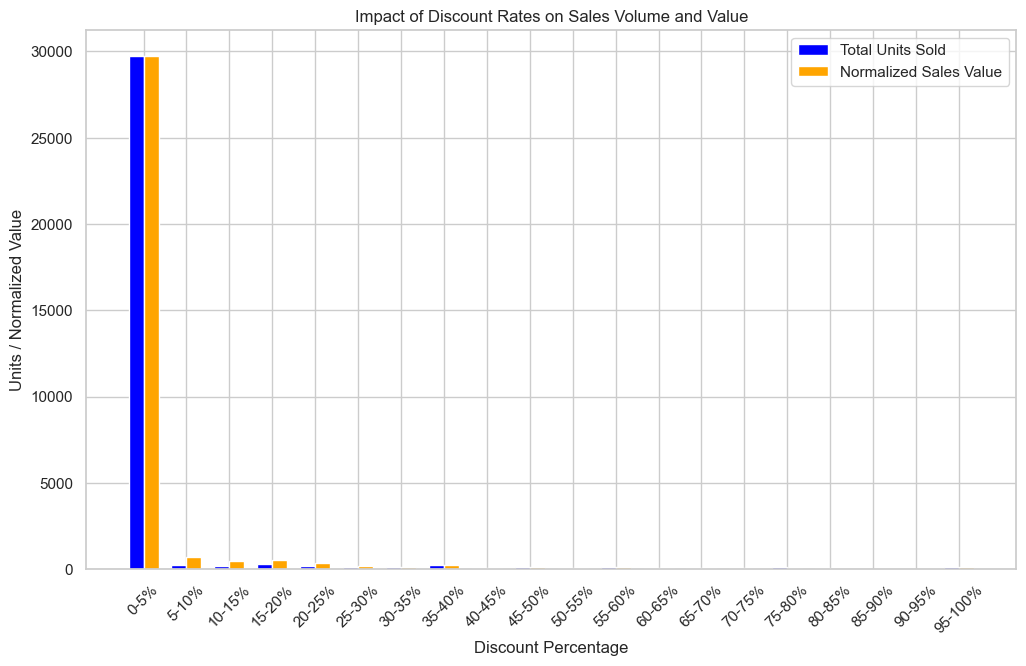

In [92]:
fig, ax = plt.subplots(figsize=(12, 7))

# Normalize the sales value to be comparable in scale to units sold
max_units = discount_analysis['Total Units Sold'].max()
max_value = discount_analysis['Total Sales Value'].max()
discount_analysis['Normalized Sales Value'] = (discount_analysis['Total Sales Value'] / max_value) * max_units

# Plotting
indices = np.arange(len(discount_analysis))
bar_width = 0.35

bars1 = ax.bar(indices, discount_analysis['Total Units Sold'], bar_width, label='Total Units Sold', color='blue')
bars2 = ax.bar(indices + bar_width, discount_analysis['Normalized Sales Value'], bar_width, label='Normalized Sales Value', color='orange')

# Labeling and aesthetics
ax.set_xlabel('Discount Percentage')
ax.set_ylabel('Units / Normalized Value')
ax.set_title('Impact of Discount Rates on Sales Volume and Value')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(discount_analysis.index, rotation=45)
ax.legend()

plt.show()

### Determine if there's an optimal discount rate that maximizes sales without significantly reducing profit margins.

In [93]:
# Calculate profit for each transaction
data_frame['Profit'] = data_frame['Invoices.Sub Total (BCY)'] - data_frame['Items.Purchase Price']

# Calculate profit margin as a percentage of sales
data_frame['Profit Margin'] = (data_frame['Profit'] / data_frame['Invoices.Sub Total (BCY)']) * 100

# Calculate the discount percentage for each transaction
data_frame['Discount Percentage'] = (data_frame['Invoice Items.Discount Amount (BCY)'] / data_frame['Invoice Items.Item Price']) * 100

In [94]:
# Define bins for discount percentages
bins = pd.interval_range(start=0, end=100, freq=10)
data_frame['Discount Bin'] = pd.cut(data_frame['Discount Percentage'], bins=bins)

# Group by discount bin and calculate totals and averages
discount_analysis = data_frame.groupby('Discount Bin').agg({
    'Invoice Items.Quantity': 'sum',
    'Invoices.Sub Total (BCY)': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean'
}).rename(columns={
    'Invoice Items.Quantity': 'Total Units Sold',
    'Invoices.Sub Total (BCY)': 'Total Sales Value',
    'Profit': 'Total Profit'
})

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\323970942.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = data_frame.groupby('Discount Bin').agg({


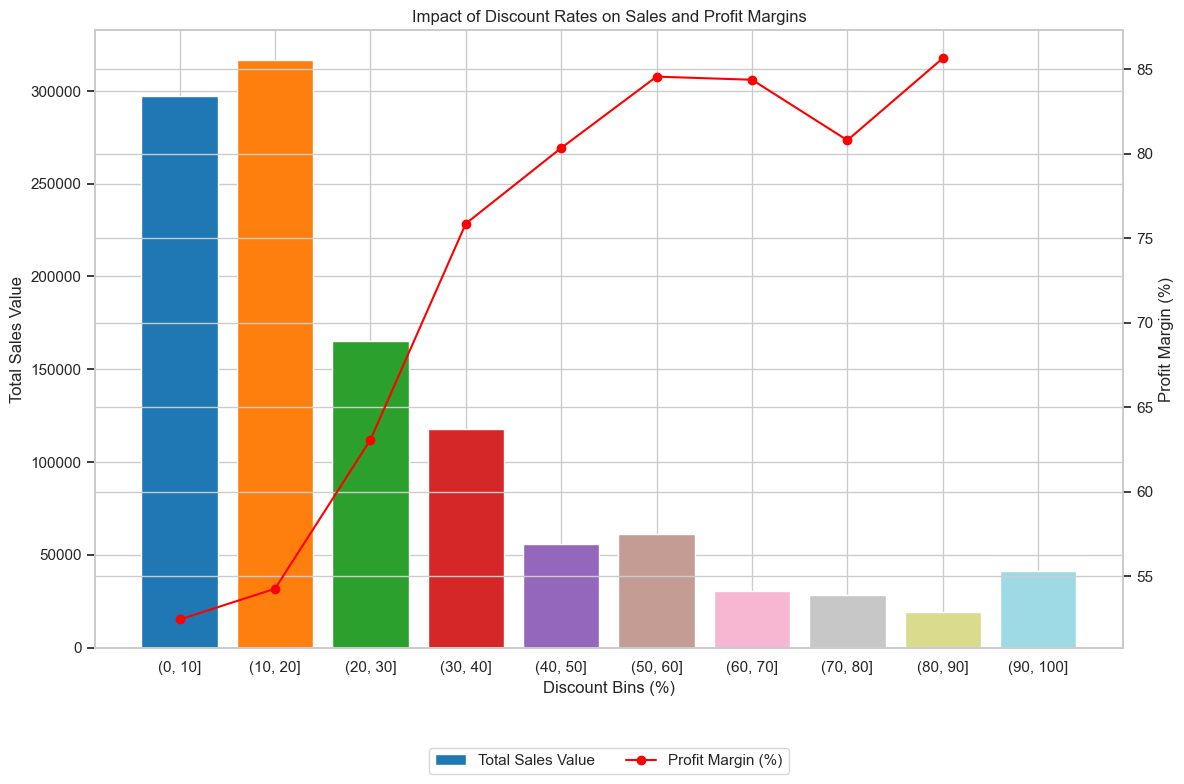

In [95]:
import matplotlib.pyplot as plt


# Setup for the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Using a colormap to generate a color for each bar dynamically
cmap = plt.get_cmap('tab20')  # 'tab20' is a good choice for distinct colors
colors = cmap(np.linspace(0, 1, len(discount_analysis)))

# Plotting total sales value with a unique color for each bar
sales_bars = ax1.bar(discount_analysis.index.astype(str), discount_analysis['Total Sales Value'], color=colors, label='Total Sales Value')

# Create a second y-axis for profit margin
ax2 = ax1.twinx()
profit_line = ax2.plot(discount_analysis.index.astype(str), discount_analysis['Profit Margin'], color='red', marker='o', label='Profit Margin (%)')

# Labeling
ax1.set_xlabel('Discount Bins (%)')
ax1.set_ylabel('Total Sales Value')
ax2.set_ylabel('Profit Margin (%)')

# Title
plt.title('Impact of Discount Rates on Sales and Profit Margins')

# Handling legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels from both axes
handles = handles1 + handles2
labels = labels1 + labels2

# Create a single legend and place it in the middle below the plot
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  
plt.show()

## Seasonal Sales Trends

### Aggregate sales data by month and year.

In [96]:
# Print the first few rows of the DataFrame to identify the date column
data_frame.head()

,Invoice ID,Invoice Number,Invoice Status,Customer Name,Invoices.Sub Total (BCY),Product Name,Invoice Items.Item ID,Invoice Items.Product ID,Items.Item ID,Invoice Items.Item Price,...,Total_GP,Product Brand,Estimated Cost,Gross Profit,Gross Profit Margin,Discount Amount,Discount Percentage,Discount Bin,Profit,Profit Margin
Invoices.Invoice Date,,,,,,,,,,,,,,,,,,,,,
2024-06-19,77421000034440848,INV-44599,Open,Customer Name_1,655.90,Product Name_1,77421000034440848,77421000000133200,77421000000133200,325.50,...,109.27,Product Brand_1,393.540,262.360,40.0,0.0,0.0,NaN,439.67,67.033084
2024-06-19,77421000034450736,INV-44603,Open,Customer Name_2,213.00,Product Name_2,77421000034450736,77421000001648368,77421000001648368,213.00,...,42.00,Product Brand_2,127.800,85.200,40.0,0.0,0.0,NaN,42.00,19.718310
2024-06-19,77421000034434480,INV-44597,Open,Customer Name_3,391.04,Product Name_3,77421000034434480,77421000002420608,77421000002420608,49.91,...,73.64,Product Brand_3,234.624,156.416,40.0,0.0,0.0,NaN,359.54,91.944558
2024-06-19,77421000034450288,INV-44602,Open,Customer Name_4,1056.82,Product Name_4,77421000034450288,77421000032920352,77421000032920352,191.40,...,225.95,Product Brand_4,634.092,422.728,40.0,0.0,0.0,NaN,910.61,86.165099
2024-06-19,77421000034457072,INV-44604,Open,Customer Name_5,29.40,Product Name_5,77421000034457088,77421000000134912,77421000000134912,29.40,...,9.87,Product Brand_1,17.640,11.760,40.0,0.0,0.0,NaN,9.87,33.571429


In [97]:
import pandas as pd

# Load the data again to ensure we have the correct dataset
data_frame = pd.read_excel('cleaned_sales_data.xlsx')

# Reset the index to access 'Invoices.Invoice Date' as a column
data_frame.reset_index(inplace=True)

# Ensure the date column is in datetime format
data_frame['Invoices.Invoice Date'] = pd.to_datetime(data_frame['Invoices.Invoice Date'])

# Extract year and month from the invoice date
data_frame['Year'] = data_frame['Invoices.Invoice Date'].dt.year
data_frame['Month'] = data_frame['Invoices.Invoice Date'].dt.strftime('%Y-%m')  # Year-Month format

# Aggregate sales data by month and year
monthly_sales_data = data_frame.groupby(['Year', 'Month']).agg({
    'Invoices.Sub Total (BCY)': 'sum'
}).rename(columns={'Invoices.Sub Total (BCY)': 'Total Sales Value'})

# Reset index to make 'Year' and 'Month' columns usable in plots
monthly_sales_data.reset_index(inplace=True)

# Display the head of the aggregated data
monthly_sales_data.head()


,Year,Month,Total Sales Value
0,2019,2019-10,75077.04
1,2019,2019-11,194106.24
2,2019,2019-12,162591.86
3,2020,2020-01,126535.52
4,2020,2020-02,164812.37


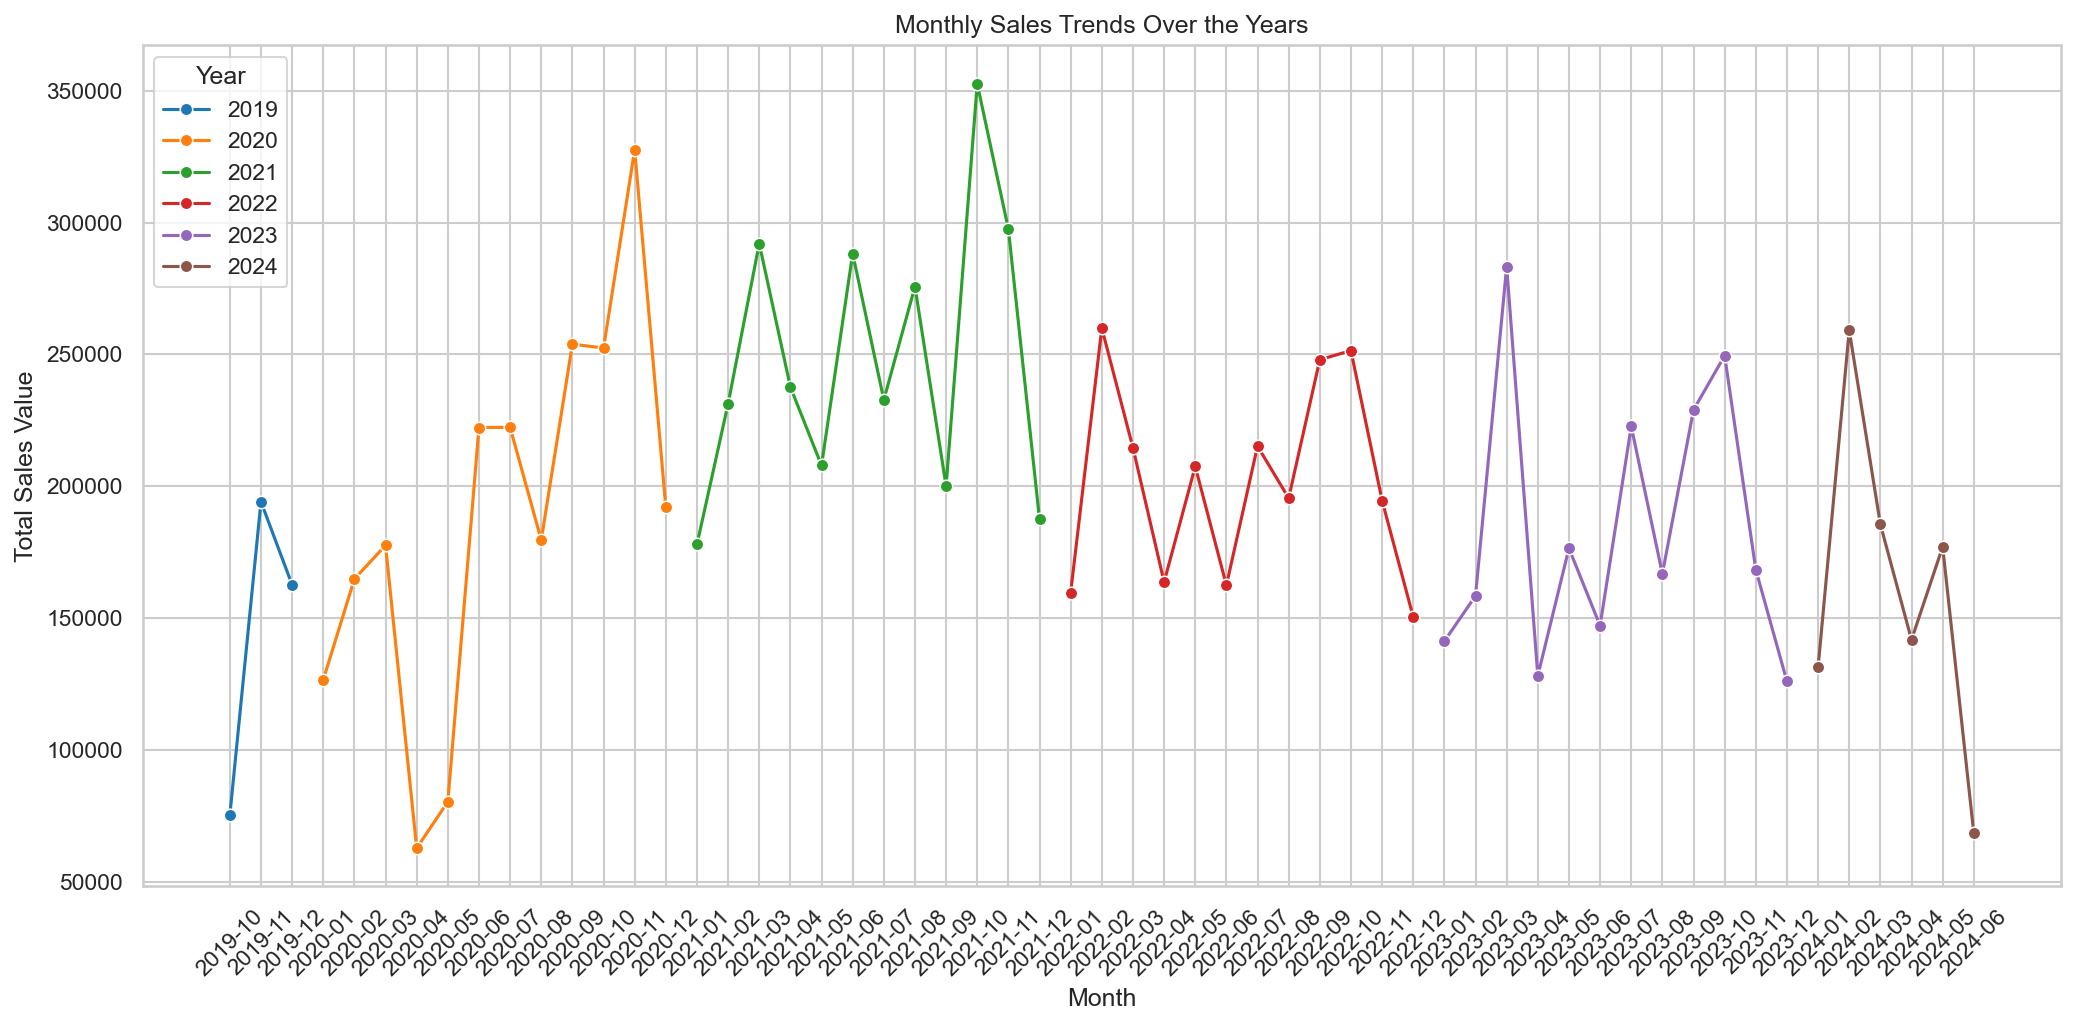

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Create a line plot to visualize monthly sales trends
plt.figure(figsize=(14, 7), dpi=150)

# Plotting the sales data
sns.lineplot(x='Month', y='Total Sales Value', hue='Year', data=monthly_sales_data, marker='o', palette='tab10')

# Formatting the plot
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper left')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

#### Identify any notable seasonal patterns.

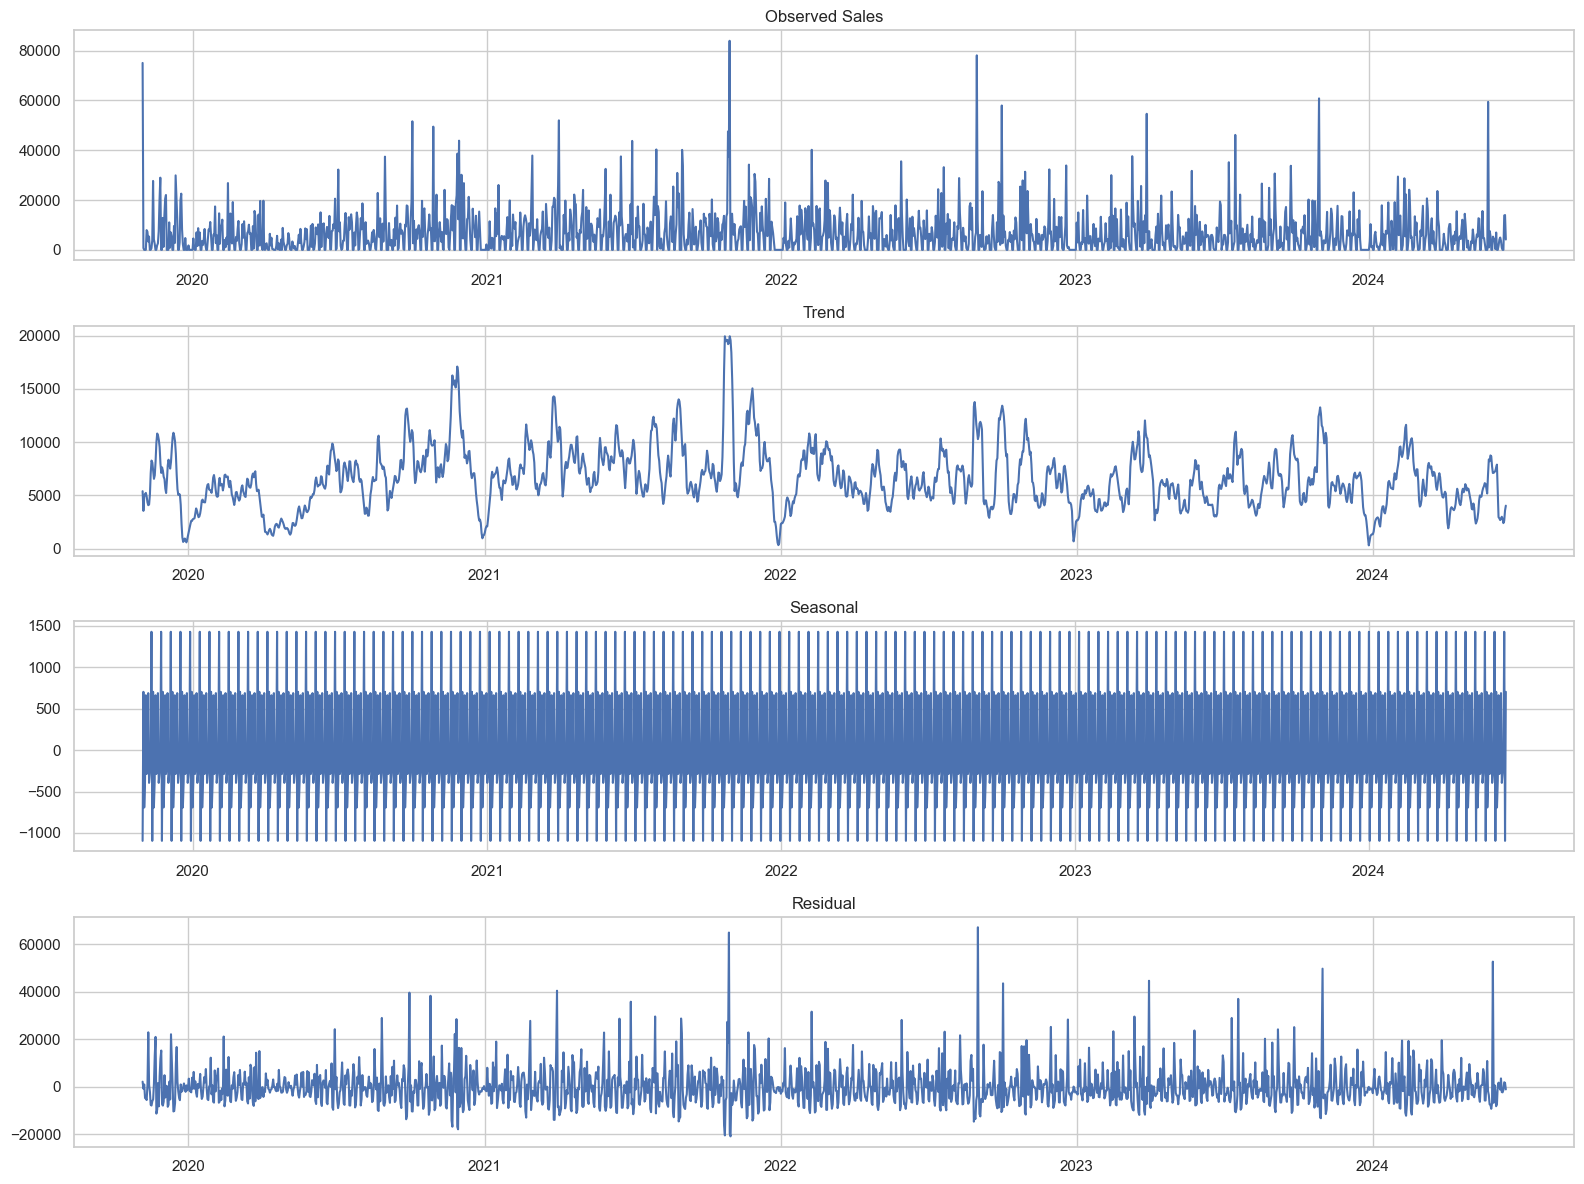

In [99]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate sales data by month for the entire period
monthly_sales = data_frame.set_index('Invoices.Invoice Date')['Invoices.Sub Total (BCY)'].resample('D').sum() #For Daily 

# Decompose the time series data
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plotting the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))

ax1.plot(decomposition.observed)
ax1.set_title('Observed Sales')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

C:\Users\Noel\AppData\Local\Temp\ipykernel_25748\3359431809.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_frame.set_index('Invoices.Invoice Date')['Invoices.Sub Total (BCY)'].resample('M').sum() #For Monthly


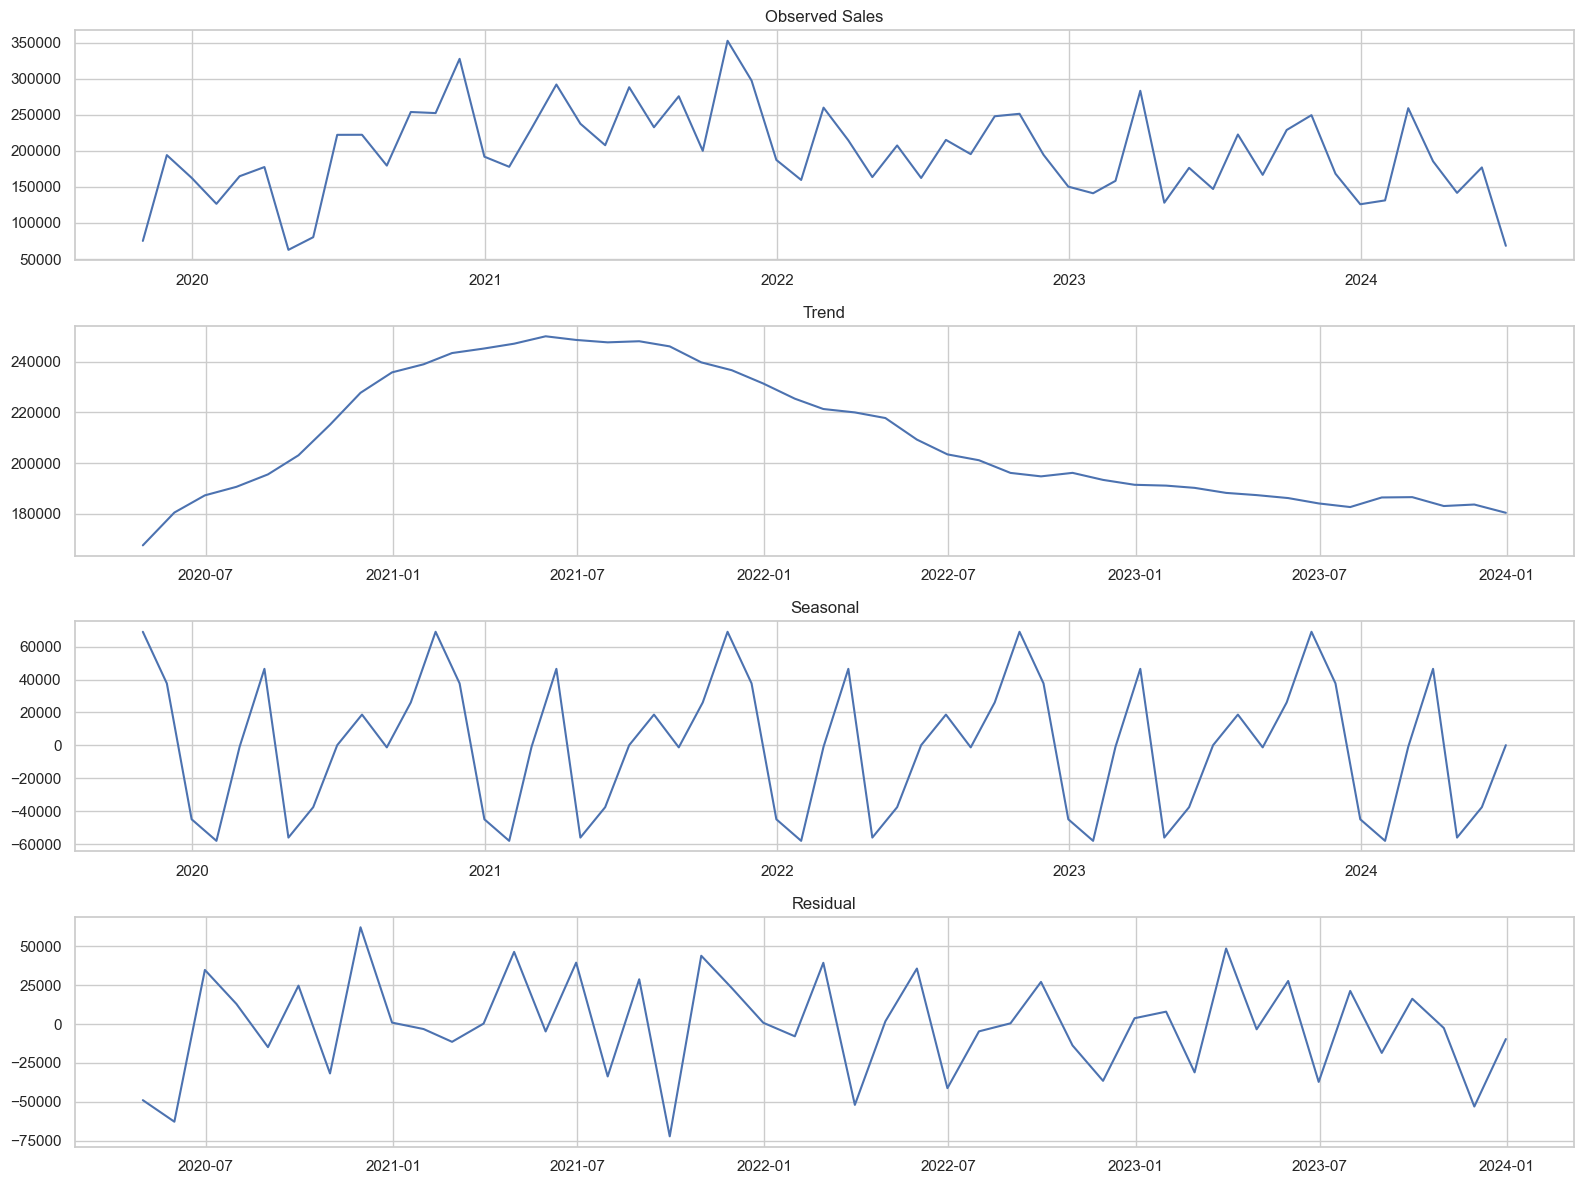

In [100]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate sales data by month for the entire period
monthly_sales = data_frame.set_index('Invoices.Invoice Date')['Invoices.Sub Total (BCY)'].resample('M').sum() #For Monthly 

# Decompose the time series data
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plotting the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))

ax1.plot(decomposition.observed)
ax1.set_title('Observed Sales')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()

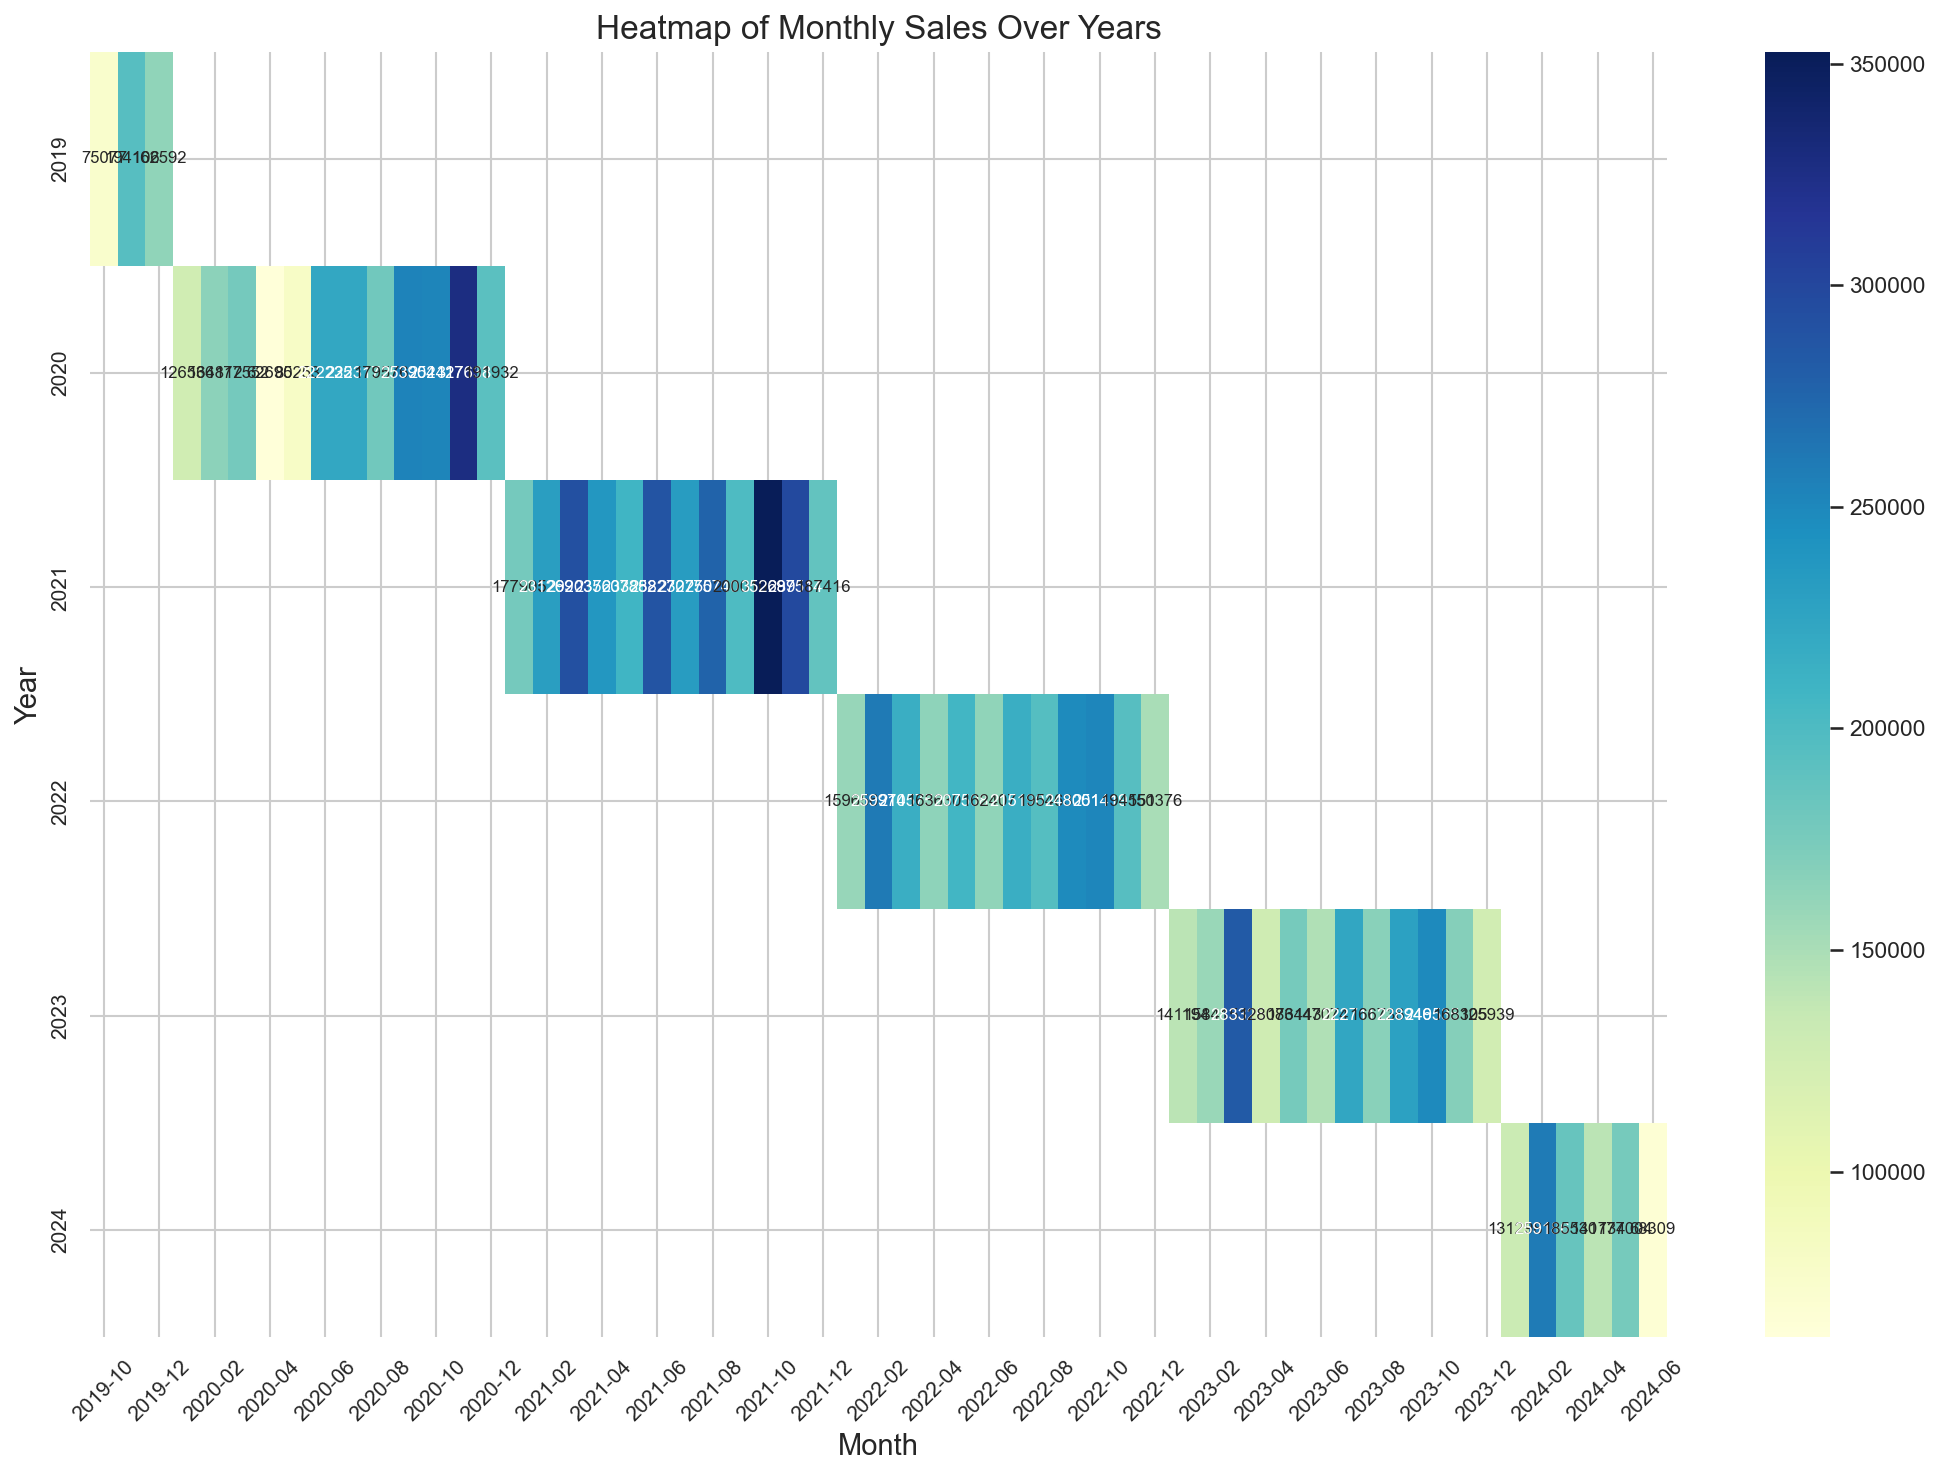

In [101]:
import seaborn as sns

# Increase the figure size for better visibility
plt.figure(figsize=(14, 10), dpi=150)

# Pivot table to create a heatmap
heatmap_data = monthly_sales_data.pivot(index='Year', columns='Month', values='Total Sales Value')

# Create the heatmap with adjusted font size for annotations
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", annot_kws={"size": 8})

plt.title('Heatmap of Monthly Sales Over Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

## Customer Segmentation and Patterns

Segment customers based on their purchasing behaviour and sales contributions

In [102]:
import pandas as pd

# Aggregate total sales, count of purchases (frequency), and calculate average order value for each customer
customer_data = data_frame.groupby('Customer Name').agg(
    Total_Sales=('Invoices.Sub Total (BCY)', 'sum'),
    Purchase_Frequency=('Invoice ID', 'count'),
    Average_Order_Value=('Invoices.Sub Total (BCY)', 'mean')
).reset_index()

# Display the first few rows to check the data
print(customer_data.head())


        Customer Name  Total_Sales  Purchase_Frequency  Average_Order_Value
0     Customer Name_1    203622.60                 107          1903.014953
1    Customer Name_10     32702.87                  33           990.996061
2   Customer Name_100    136781.26                  84          1628.348333
3  Customer Name_1000      1706.65                   1          1706.650000
4  Customer Name_1001        41.04                   1            41.040000


In [103]:
# Filter out only numeric columns for calculating quantiles
numeric_data = customer_data[['Total_Sales', 'Purchase_Frequency', 'Average_Order_Value']]

# Calculate quantiles for numeric data only
quantiles = numeric_data.quantile([0.33, 0.66])

# Function to classify customers based on quantiles
def classify_customers(value, quantiles, label):
    if value <= quantiles.loc[0.33]:
        return f'Low {label}'
    elif value <= quantiles.loc[0.66]:
        return f'Medium {label}'
    else:
        return f'High {label}'

# Apply classification to each metric
customer_data['Sales Segment'] = customer_data['Total_Sales'].apply(classify_customers, args=(quantiles['Total_Sales'], 'Sales'))
customer_data['Frequency Segment'] = customer_data['Purchase_Frequency'].apply(classify_customers, args=(quantiles['Purchase_Frequency'], 'Frequency'))
customer_data['Order Value Segment'] = customer_data['Average_Order_Value'].apply(classify_customers, args=(quantiles['Average_Order_Value'], 'Order Value'))

# Display the first few rows to check the new segments
print(customer_data.head())

        Customer Name  Total_Sales  Purchase_Frequency  Average_Order_Value  \
0     Customer Name_1    203622.60                 107          1903.014953   
1    Customer Name_10     32702.87                  33           990.996061   
2   Customer Name_100    136781.26                  84          1628.348333   
3  Customer Name_1000      1706.65                   1          1706.650000   
4  Customer Name_1001        41.04                   1            41.040000   

  Sales Segment Frequency Segment Order Value Segment  
0    High Sales    High Frequency    High Order Value  
1    High Sales    High Frequency    High Order Value  
2    High Sales    High Frequency    High Order Value  
3  Medium Sales     Low Frequency    High Order Value  
4     Low Sales     Low Frequency     Low Order Value  


['High Sales' 'Medium Sales' 'Low Sales']
['High Frequency' 'Low Frequency' 'Medium Frequency']
['High Order Value' 'Low Order Value' 'Medium Order Value']


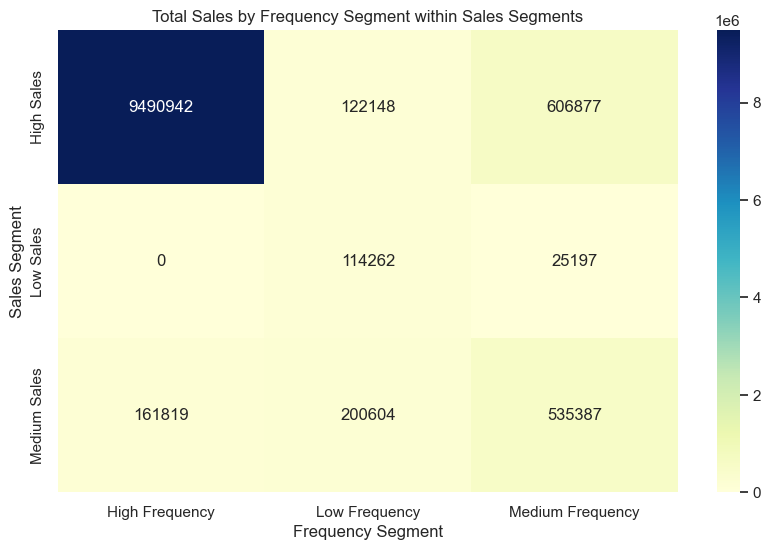

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's first check the unique values in the segments to understand what we're working with
print(customer_data['Sales Segment'].unique())
print(customer_data['Frequency Segment'].unique())
print(customer_data['Order Value Segment'].unique())

# Assuming the data checks out, we'll try generating one heatmap for 'Sales Segment' and 'Frequency Segment'
try:
    # Pivot table creation for Sales Segment vs Frequency Segment
    pivot_table = customer_data.pivot_table(index='Sales Segment', columns='Frequency Segment', values='Total_Sales', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title('Total Sales by Frequency Segment within Sales Segments')
    plt.ylabel('Sales Segment')
    plt.xlabel('Frequency Segment')
    plt.show()
except Exception as e:
    print("An error occurred:", e)

# If the above works, repeat for 'Order Value Segment'

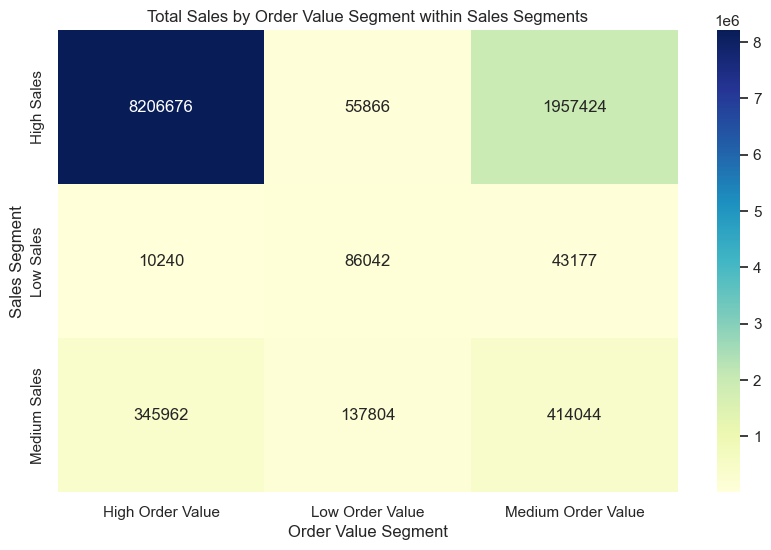

In [105]:
try:
    # Pivot table creation for Sales Segment vs Order Value Segment
    pivot_table = customer_data.pivot_table(index='Sales Segment', columns='Order Value Segment', values='Total_Sales', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title('Total Sales by Order Value Segment within Sales Segments')
    plt.ylabel('Sales Segment')
    plt.xlabel('Order Value Segment')
    plt.show()
except Exception as e:
    print("An error occurred:", e)


### Identify patterns in total sales distribution, purchase frequency, and average order value.

In [106]:
# Generate descriptive statistics for the metrics
stats_summary = customer_data[['Total_Sales', 'Purchase_Frequency', 'Average_Order_Value']].describe()
print(stats_summary)

         Total_Sales  Purchase_Frequency  Average_Order_Value
count    1111.000000         1111.000000          1111.000000
mean    10132.524599           10.924392           785.310497
std     27146.054834           23.605764          1100.843545
min         0.000000            1.000000             0.000000
25%       586.385000            1.000000           294.500000
50%      2209.540000            4.000000           552.385000
75%      8048.285000           11.000000           964.882619
max    420526.160000          366.000000         23350.530000


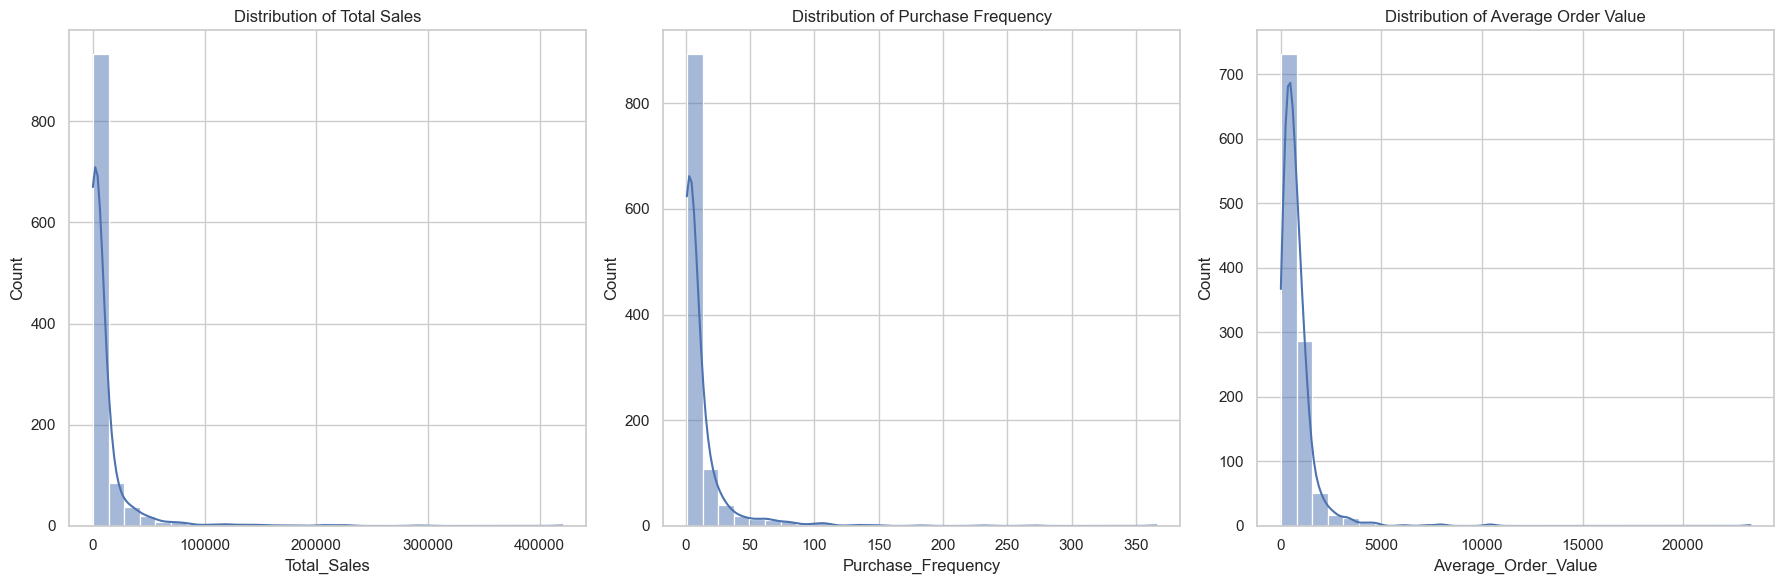

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Plot histograms to understand the distribution
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(customer_data['Total_Sales'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Total Sales')

sns.histplot(customer_data['Purchase_Frequency'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Purchase Frequency')

sns.histplot(customer_data['Average_Order_Value'], bins=30, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Average Order Value')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

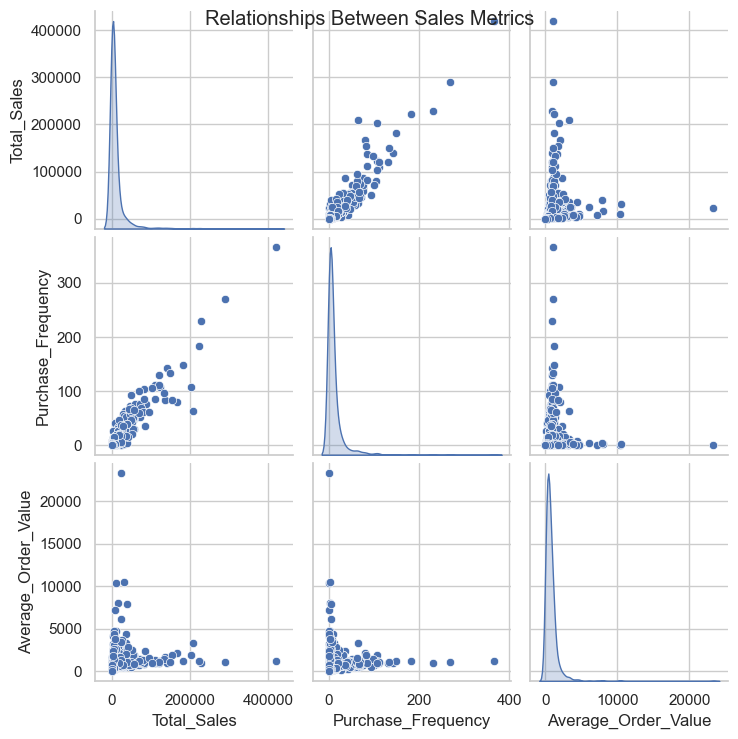

In [108]:
# Scatter plots to identify potential relationships
plt.figure(figsize=(12, 6))
sns.pairplot(customer_data, vars=['Total_Sales', 'Purchase_Frequency', 'Average_Order_Value'], kind='scatter', diag_kind='kde')
plt.suptitle('Relationships Between Sales Metrics')
plt.show()

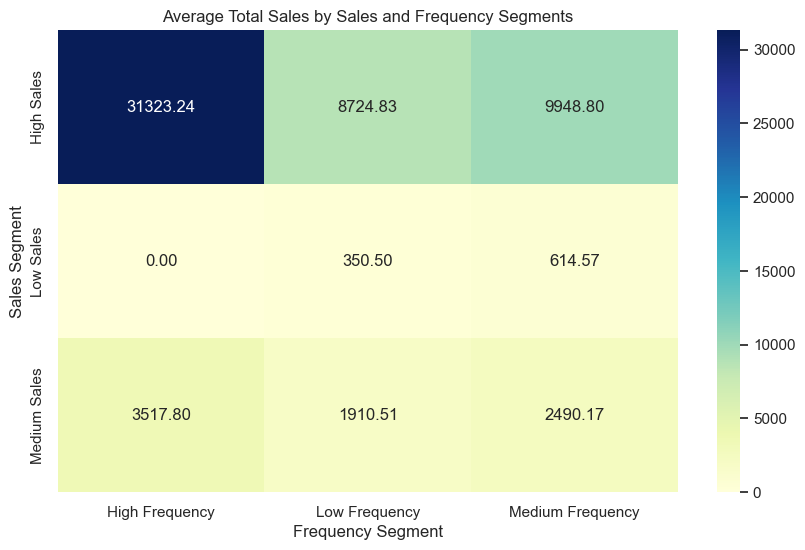

In [109]:
# Heatmap of Total Sales by Sales Segment and Purchase Frequency
pivot_table_sales = customer_data.pivot_table(index='Sales Segment', columns='Frequency Segment', values='Total_Sales', aggfunc='mean', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_sales, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Total Sales by Sales and Frequency Segments')
plt.show()

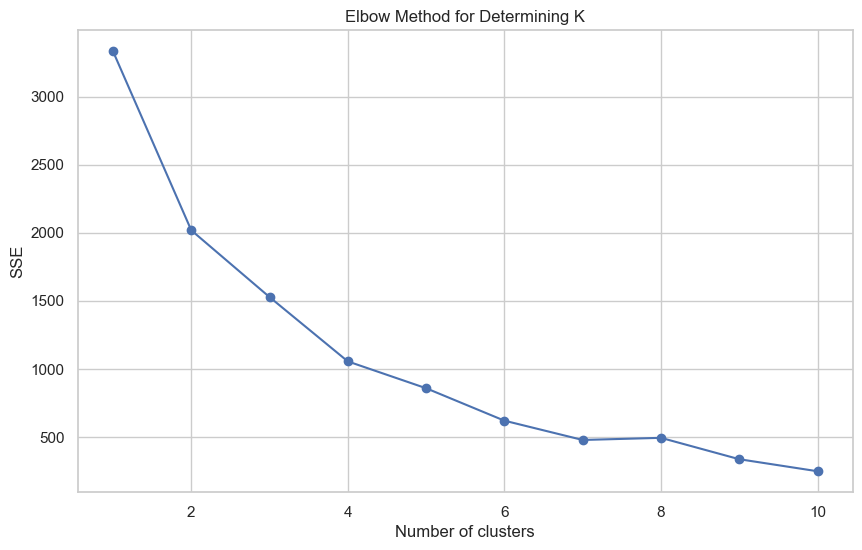

           Total_Sales  Purchase_Frequency  Average_Order_Value  Count
Cluster                                                               
0         32286.160584           28.416058          2203.894348    137
1          3595.725734            5.766247           569.693934    954
2        170185.424000          137.150000          1352.921179     20


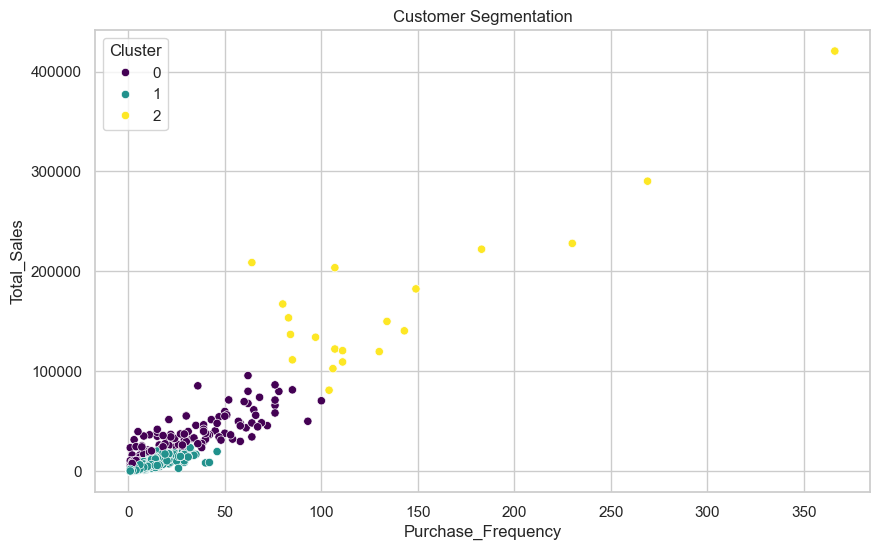

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data preparation
features = customer_data[['Total_Sales', 'Purchase_Frequency', 'Average_Order_Value']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Assuming the elbow point is at k=3 (change this based on your plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster labels to the original data
customer_data['Cluster'] = clusters

# Analyzing the clusters
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total_Sales': 'mean',
    'Purchase_Frequency': 'mean',
    'Average_Order_Value': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})

print(cluster_summary)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Frequency', y='Total_Sales', hue='Cluster', data=customer_data, palette='viridis', legend='full')
plt.title('Customer Segmentation')
plt.show()